In [1]:
"""
================================================================================
ETAPA 1: CARREGAR E EXPLORAR OS DADOS
================================================================================

O dataset Yeast contém informações sobre localização de proteínas em células
de levedura. É um problema de classificação multiclasse.

Features (8 atributos numéricos entre 0 e 1):
- mcg: McGeoch's method for signal sequence recognition
- gvh: von Heijne's method for signal sequence recognition
- alm: Score of the ALOM membrane spanning region prediction program
- mit: Score of discriminant analysis of the amino acid content
- erl: Presence of "HDEL" substring (binary)
- pox: Peroxisomal targeting signal
- vac: Score of discriminant analysis of amino acid content of vacuolar proteins
- nuc: Score of discriminant analysis of nuclear localization signals

Classes (10 localizações celulares):
- CYT (cytosolic or cytoskeletal)
- NUC (nuclear)
- MIT (mitochondrial)
- ME3 (membrane protein, no N-terminal signal)
- ME2 (membrane protein, uncleaved signal)
- ME1 (membrane protein, cleaved signal)
- EXC (extracellular)
- VAC (vacuolar)
- POX (peroxisomal)
- ERL (endoplasmic reticulum lumen)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
np.random.seed(42)

print("="*70)
print("ETAPA 1: CARREGAR E EXPLORAR OS DADOS")
print("="*70)

# -----------------------------------------------------------------------------
# 1.1 Carregar o dataset
# -----------------------------------------------------------------------------
print("\n[1.1] Carregando o dataset...")

df = pd.read_csv('yeast.csv')

print(f"Dataset carregado com sucesso!")
print(f"Shape: {df.shape}")
print(f"Colunas: {list(df.columns)}")

# -----------------------------------------------------------------------------
# 1.2 Visualizar primeiras linhas
# -----------------------------------------------------------------------------
print("\n[1.2] Primeiras 5 linhas do dataset:")
print(df.head().to_string())

# -----------------------------------------------------------------------------
# 1.3 Informações estatísticas
# -----------------------------------------------------------------------------
print("\n[1.3] Estatísticas das features:")
print(df.describe().round(3).to_string())

# -----------------------------------------------------------------------------
# 1.4 Verificar valores faltantes
# -----------------------------------------------------------------------------
print("\n[1.4] Valores faltantes por coluna:")
missing = df.isnull().sum()
print(f"Total de valores faltantes: {missing.sum()}")

# -----------------------------------------------------------------------------
# 1.5 Distribuição das classes
# -----------------------------------------------------------------------------
print("\n[1.5] Distribuição das 10 classes originais:")
print("-"*50)

class_counts = df['Class'].value_counts().sort_values(ascending=False)
total = len(df)

for cls, count in class_counts.items():
    pct = 100 * count / total
    bar = "█" * int(pct/2)
    print(f"      {cls:4s}: {count:4d} ({pct:5.1f}%) {bar}")

print(f"Total de amostras: {total}")
print(f"Número de classes: {len(class_counts)}")

# -----------------------------------------------------------------------------
# 1.6 Separar features (X) e target (y)
# -----------------------------------------------------------------------------
print("\n[1.6] Separando features e target...")

# Remover coluna de nome da sequência (não é feature)
X = df.drop(['Sequence Name', 'Class'], axis=1).values
y = df['Class'].values

print(f"X shape: {X.shape} (amostras × features)")
print(f"y shape: {y.shape} (amostras)")
print(f"Features: {list(df.drop(['Sequence Name', 'Class'], axis=1).columns)}")

# -----------------------------------------------------------------------------
# 1.7 Visualizar correlação entre features
# -----------------------------------------------------------------------------
print("\n[1.7] Gerando matriz de correlação...")

fig, ax = plt.subplots(figsize=(10, 8))
feature_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
corr_matrix = df[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, ax=ax)
ax.set_title('Matriz de Correlação das Features')
plt.tight_layout()
plt.savefig('etapa1_correlacao.png', dpi=150)
plt.close()
print("Salvo: etapa1_correlacao.png")

# -----------------------------------------------------------------------------
# 1.8 Visualizar distribuição das classes
# -----------------------------------------------------------------------------
print("\n[1.8] Gerando gráfico de distribuição das classes...")

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))
bars = ax.bar(class_counts.index, class_counts.values, color=colors)
ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição das 10 Classes Originais do Dataset Yeast')

# Adicionar valores nas barras
for bar, count in zip(bars, class_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('etapa1_distribuicao_classes.png', dpi=150)
plt.close()
print("Salvo: etapa1_distribuicao_classes.png")

ETAPA 1: CARREGAR E EXPLORAR OS DADOS

[1.1] Carregando o dataset...
Dataset carregado com sucesso!
Shape: (1484, 10)
Colunas: ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Class']

[1.2] Primeiras 5 linhas do dataset:
  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc Class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT

[1.3] Estatísticas das features:
            mcg       gvh       alm       mit       erl       pox       vac       nuc
count  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000
mean      0.500     0.500     0.500     0.261     0.505     0.008     0.500     0.276
std       0.137     0.124     0.087     0.137     0.

In [2]:
"""
================================================================================
ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET
================================================================================

O enunciado pede para trabalhar com 2 versões do Yeast:
- Versão 1: 10 classes originais
- Versão 2: K* classes (K* = 2, obtido na Questão 1)

Para criar a versão com 2 classes, precisamos AGRUPAR as 10 classes originais
em 2 grupos. Isso pode ser feito de várias formas:

1. Usar o resultado do clustering KFCM-K-W-1 da Questão 1
2. Agrupar por similaridade/frequência
3. Agrupar por localização celular (membrana vs outras)

Aqui vamos usar uma estratégia baseada em localização celular:
- Classe 0: Proteínas citosólicas/nucleares (CYT, NUC, MIT)
- Classe 1: Proteínas de membrana/outras (ME1, ME2, ME3, EXC, VAC, POX, ERL)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print("="*70)
print("ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET")
print("="*70)

# -----------------------------------------------------------------------------
# 2.1 Carregar os dados
# -----------------------------------------------------------------------------
print("\n[2.1] Carregando os dados...")

df = pd.read_csv('yeast.csv')
X = df.drop(['Sequence Name', 'Class'], axis=1).values
y_original = df['Class'].values

print(f"      Amostras: {len(y_original)}")
print(f"      Classes originais: {np.unique(y_original)}")

# -----------------------------------------------------------------------------
# 2.2 VERSÃO 1: Dataset com 10 classes
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("[2.2] VERSÃO 1: Dataset com 10 classes originais")
print("-"*70)

# Codificar labels para números (necessário para sklearn)
le_10 = LabelEncoder()
y_10classes = le_10.fit_transform(y_original)

print(f"\n      Mapeamento das classes:")
for i, cls in enumerate(le_10.classes_):
    count = np.sum(y_original == cls)
    print(f"        {cls} → {i} ({count} amostras)")

print(f"\n      Shape X: {X.shape}")
print(f"      Shape y: {y_10classes.shape}")
print(f"      Classes únicas: {np.unique(y_10classes)}")

# -----------------------------------------------------------------------------
# 2.3 VERSÃO 2: Dataset com 2 classes (K* = 2)
# -----------------------------------------------------------------------------
print("\n" + "-"*70)
print("[2.3] VERSÃO 2: Dataset com 2 classes (K* = 2)")
print("-"*70)

print("""
      Estratégia de agrupamento baseada em localização celular:

      CLASSE 0 - Proteínas intracelulares (citoplasma/núcleo/mitocôndria):
        - CYT (citosólica)
        - NUC (nuclear)
        - MIT (mitocondrial)

      CLASSE 1 - Proteínas de membrana/secretadas/outras organelas:
        - ME1, ME2, ME3 (membrana)
        - EXC (extracelular)
        - VAC (vacuolar)
        - POX (peroxissomal)
        - ERL (retículo endoplasmático)
""")

# Mapeamento para 2 classes
mapping_2classes = {
    'CYT': 0,   # Citosólica → Classe 0
    'NUC': 0,   # Nuclear → Classe 0
    'MIT': 0,   # Mitocondrial → Classe 0
    'ME3': 1,   # Membrana → Classe 1
    'ME2': 1,   # Membrana → Classe 1
    'ME1': 1,   # Membrana → Classe 1
    'EXC': 1,   # Extracelular → Classe 1
    'VAC': 1,   # Vacuolar → Classe 1
    'POX': 1,   # Peroxissomal → Classe 1
    'ERL': 1,   # Retículo Endoplasmático → Classe 1
}

# Aplicar mapeamento
y_2classes = np.array([mapping_2classes[cls] for cls in y_original])

# Contar amostras por classe
count_0 = np.sum(y_2classes == 0)
count_1 = np.sum(y_2classes == 1)

print(f"      Resultado do agrupamento:")
print(f"        Classe 0: {count_0} amostras ({100*count_0/len(y_2classes):.1f}%)")
print(f"        Classe 1: {count_1} amostras ({100*count_1/len(y_2classes):.1f}%)")

# -----------------------------------------------------------------------------
# 2.4 Visualizar as duas versões
# -----------------------------------------------------------------------------
print("\n[2.4] Gerando visualização comparativa...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Versão 1: 10 classes
ax1 = axes[0]
class_counts_10 = pd.Series(y_original).value_counts().sort_index()
colors_10 = plt.cm.tab10(np.linspace(0, 1, 10))
bars1 = ax1.bar(range(10), [class_counts_10.get(cls, 0) for cls in le_10.classes_],
                color=colors_10)
ax1.set_xticks(range(10))
ax1.set_xticklabels(le_10.classes_, rotation=45, ha='right')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Quantidade')
ax1.set_title('VERSÃO 1: 10 Classes Originais')
ax1.grid(axis='y', alpha=0.3)

# Versão 2: 2 classes
ax2 = axes[1]
class_counts_2 = [count_0, count_1]
colors_2 = ['#3498db', '#e74c3c']
bars2 = ax2.bar(['Classe 0\n(Intracelular)', 'Classe 1\n(Membrana/Outras)'],
                class_counts_2, color=colors_2, width=0.5)
ax2.set_ylabel('Quantidade')
ax2.set_title('VERSÃO 2: 2 Classes (K* = 2)')
ax2.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, count in zip(bars2, class_counts_2):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count}\n({100*count/len(y_2classes):.1f}%)',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('etapa2_duas_versoes.png', dpi=150, bbox_inches='tight')
plt.close()
print("Salvo: etapa2_duas_versoes.png")

# -----------------------------------------------------------------------------
# 2.5 Salvar dados para próximas etapas
# -----------------------------------------------------------------------------
print("\n[2.5] Salvando dados processados...")

np.save('X_data.npy', X)
np.save('y_10classes.npy', y_10classes)
np.save('y_2classes.npy', y_2classes)

# Salvar mapeamento
import json
with open('label_mapping_10.json', 'w') as f:
    json.dump({i: cls for i, cls in enumerate(le_10.classes_)}, f)

print("X_data.npy")
print("y_10classes.npy")
print("y_2classes.npy")
print("label_mapping_10.json")

ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET

[2.1] Carregando os dados...
      Amostras: 1484
      Classes originais: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']

----------------------------------------------------------------------
[2.2] VERSÃO 1: Dataset com 10 classes originais
----------------------------------------------------------------------

      Mapeamento das classes:
        CYT → 0 (463 amostras)
        ERL → 1 (5 amostras)
        EXC → 2 (35 amostras)
        ME1 → 3 (44 amostras)
        ME2 → 4 (51 amostras)
        ME3 → 5 (163 amostras)
        MIT → 6 (244 amostras)
        NUC → 7 (429 amostras)
        POX → 8 (20 amostras)
        VAC → 9 (30 amostras)

      Shape X: (1484, 8)
      Shape y: (1484,)
      Classes únicas: [0 1 2 3 4 5 6 7 8 9]

----------------------------------------------------------------------
[2.3] VERSÃO 2: Dataset com 2 classes (K* = 2)
----------------------------------------------------------------------

      Estr

ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET

[2.1] Carregando os dados...
Amostras: 1484
Features: 8
Classes originais: ['CYT', 'ERL', 'EXC', 'ME1', 'ME2', 'ME3', 'MIT', 'NUC', 'POX', 'VAC']

----------------------------------------------------------------------
[2.2] VERSÃO 1: Dataset com 10 classes originais
----------------------------------------------------------------------
Mapeamento das classes:
 CYT → 0 ( 463 amostras,  31.2%)
 ERL → 1 (   5 amostras,   0.3%)
 EXC → 2 (  35 amostras,   2.4%)
 ME1 → 3 (  44 amostras,   3.0%)
 ME2 → 4 (  51 amostras,   3.4%)
 ME3 → 5 ( 163 amostras,  11.0%)
 MIT → 6 ( 244 amostras,  16.4%)
 NUC → 7 ( 429 amostras,  28.9%)
 POX → 8 (  20 amostras,   1.3%)
 VAC → 9 (  30 amostras,   2.0%)
Shape X: (1484, 8)
Shape y: (1484,)
Classes únicas: [0 1 2 3 4 5 6 7 8 9]

----------------------------------------------------------------------
[2.3] VERSÃO 2: Dataset com K*=2 classes (KFCM-K-W-1)
-----------------------------------------------------------------

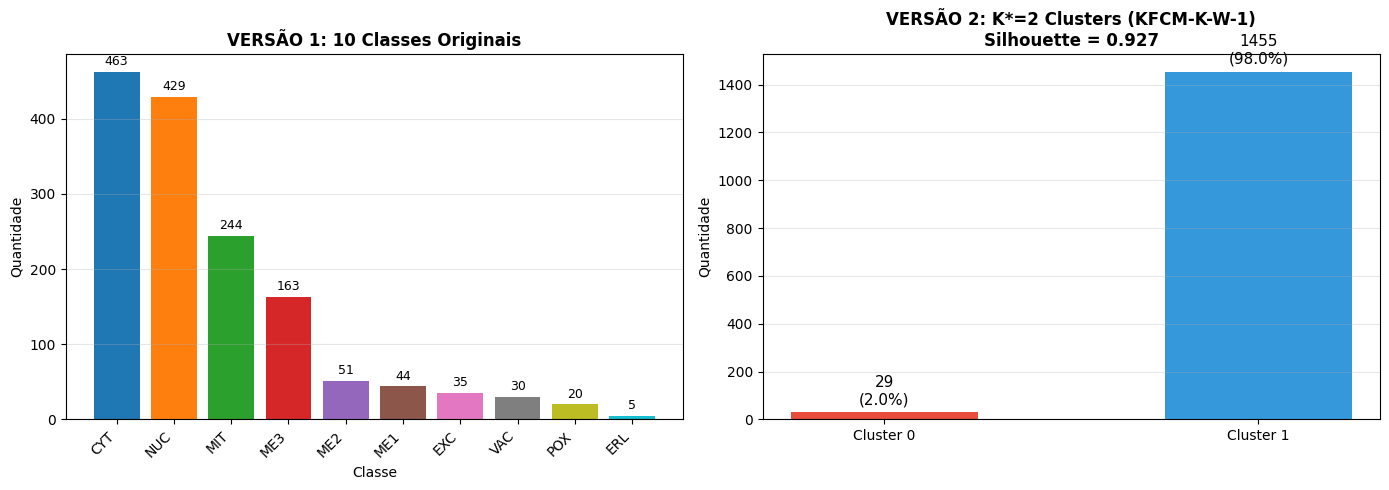

In [3]:
"""
================================================================================
ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET
================================================================================

O enunciado pede para trabalhar com 2 versões do Yeast:
- Versão 1: 10 classes originais
- Versão 2: K* classes (K* = 2, obtido na Questão 1 via KFCM-K-W-1) (crisp_partition.txt),

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import json

print("="*70)
print("ETAPA 2: CRIAR AS DUAS VERSÕES DO DATASET")
print("="*70)

# -----------------------------------------------------------------------------
# 2.1 Carregar os dados
# -----------------------------------------------------------------------------
print("\n[2.1] Carregando os dados...")

df = pd.read_csv('yeast.csv')
X = df.drop(['Sequence Name', 'Class'], axis=1).values
y_original = df['Class'].values

print(f"Amostras: {len(y_original)}")
print(f"Features: {X.shape[1]}")
print(f"Classes originais: {list(np.unique(y_original))}")

# -----------------------------------------------------------------------------
# 2.2 VERSÃO 1: Dataset com 10 classes
# -----------------------------------------------------------------------------
print("\n"+ "-"*70)
print("[2.2] VERSÃO 1: Dataset com 10 classes originais")
print("-"*70)

# Codificar labels para números (necessário para sklearn)
le_10 = LabelEncoder()
y_10classes = le_10.fit_transform(y_original)

print(f"Mapeamento das classes:")
for i, cls in enumerate(le_10.classes_):
    count = np.sum(y_original == cls)
    pct = 100 * count / len(y_original)
    print(f" {cls} → {i} ({count:4d} amostras, {pct:5.1f}%)")

print(f"Shape X: {X.shape}")
print(f"Shape y: {y_10classes.shape}")
print(f"Classes únicas: {np.unique(y_10classes)}")

# -----------------------------------------------------------------------------
# 2.3 VERSÃO 2: Dataset com K*=2 classes (LABELS DO KFCM-K-W-1!)
# -----------------------------------------------------------------------------
print("\n"+ "-"*70)
print("[2.3] VERSÃO 2: Dataset com K*=2 classes (KFCM-K-W-1)")
print("-"*70)

# Carregar labels do arquivo crisp_partition.txt
y_2classes = np.loadtxt('crisp_partition.txt').astype(int)

print(f"Labels carregados de crisp_partition.txt")
print(f"Total de labels: {len(y_2classes)}")

# Verificar consistência
assert len(y_2classes) == len(y_original), "ERRO: Número de labels diferente do número de amostras!"

# Contagem
count_0 = np.sum(y_2classes == 0)
count_1 = np.sum(y_2classes == 1)

print(f"Distribuição dos clusters:")
print(f" Cluster 0: {count_0:4d} amostras ({100*count_0/len(y_2classes):5.1f}%)")
print(f" Cluster 1: {count_1:4d} amostras ({100*count_1/len(y_2classes):5.1f}%)")

# Analisar composição dos clusters
print("Composição dos clusters (classes originais em cada cluster):")
for cluster in [0, 1]:
    print(f"📦 CLUSTER {cluster}:")
    mask = y_2classes == cluster
    classes_in_cluster = y_original[mask]
    class_counts = Counter(classes_in_cluster)

    total = sum(class_counts.values())
    for cls, count in sorted(class_counts.items(), key=lambda x: -x[1]):
        pct = 100 * count / total
        bar = "█"* int(pct/5)
        print(f"  {cls:4s}: {count:4d} ({pct:5.1f}%) {bar}")

# -----------------------------------------------------------------------------
# 2.4 Visualizar as duas versões
# -----------------------------------------------------------------------------
print("\n[2.4] Gerando visualização comparativa...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Versão 1: 10 classes
ax1 = axes[0]
class_counts_10 = pd.Series(y_original).value_counts().sort_values(ascending=False)
colors_10 = plt.cm.tab10(np.linspace(0, 1, 10))
bars1 = ax1.bar(range(len(class_counts_10)), class_counts_10.values, color=colors_10)
ax1.set_xticks(range(len(class_counts_10)))
ax1.set_xticklabels(class_counts_10.index, rotation=45, ha='right')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Quantidade')
ax1.set_title('VERSÃO 1: 10 Classes Originais', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, count in zip(bars1, class_counts_10.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontsize=9)

# Versão 2: 2 clusters (KFCM-K-W-1)
ax2 = axes[1]
class_counts_2 = [count_0, count_1]
colors_2 = ['#e74c3c', '#3498db']
bars2 = ax2.bar(['Cluster 0', 'Cluster 1'], class_counts_2, color=colors_2, width=0.5)
ax2.set_ylabel('Quantidade')
ax2.set_title('VERSÃO 2: K*=2 Clusters (KFCM-K-W-1)\nSilhouette = 0.927',
              fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, count in zip(bars2, class_counts_2):
    pct = 100 * count / len(y_2classes)
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('step2_duas_versoes.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
"""
================================================================================
ETAPA 3: IMPLEMENTAÇÃO DOS 5 CLASSIFICADORES
================================================================================

Os 5 classificadores pedidos no enunciado:
1. Bayesiano Gaussiano (Normal Multivariada)
2. Bayesiano baseado em K-Vizinhos (KNN Bayesiano - NÃO é o KNN tradicional!)
3. Bayesiano Janela de Parzen (KDE)
4. Regressão Logística
5. Voto Majoritário (dos 3 primeiros)

IMPORTANTE: O classificador 2 é o KNN BAYESIANO, que é diferente do KNN
tradicional por votação. O KNN Bayesiano estima p(x|ωi) e aplica Bayes.
"""

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors, KernelDensity
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("ETAPA 3: IMPLEMENTAÇÃO DOS 5 CLASSIFICADORES")
print("="*70)

# =============================================================================
# CARREGAR DADOS
# =============================================================================
print("\n[3.0] Carregando dados...")

# Carregar dataset Yeast do CSV
df = pd.read_csv('yeast.csv')
X = df.drop(['Sequence Name', 'Class'], axis=1).values
y_original = df['Class'].values

# Codificar labels das 10 classes originais
le_10 = LabelEncoder()
y_10classes = le_10.fit_transform(y_original)

# Carregar labels do clustering KFCM-K-W-1 (Questão 1)
y_2classes = np.loadtxt('crisp_partition.txt').astype(int)

print(f"      Dataset: {X.shape[0]} amostras, {X.shape[1]} features")
print(f"      Versão 1: 10 classes originais")
print(f"      Versão 2: 2 clusters (KFCM-K-W-1)")


# =============================================================================
# CLASSIFICADOR 1: Bayesiano Gaussiano
# =============================================================================
print("\n" + "═"*70)
print("CLASSIFICADOR 1: BAYESIANO GAUSSIANO")
print("═"*70)

print("""
Teoria:
-------
Baseado no Teorema de Bayes com distribuição Normal Multivariada.

Regra de decisão: Classificar x na classe ωl se P(ωl|x) = max P(ωi|x)

Onde:
    P(ωi|x) = p(x|ωi) * P(ωi) / p(x)

    p(x|ωi) = N(x; μi, Σi)  (Normal Multivariada)
    P(ωi) = ni/n            (estimativa MV - proporção)
    μi = média amostral da classe i
    Σi = covariância amostral da classe i

Hiperparâmetros: Nenhum
""")

class BayesianoGaussiano(BaseEstimator, ClassifierMixin):
    """
    Classificador Bayesiano com distribuição Normal Multivariada.
    Implementação manual seguindo as equações do enunciado.
    """
    def __init__(self):
        self.classes_ = None
        self.priors_ = {}      # P(ωi)
        self.means_ = {}       # μi
        self.covs_ = {}        # Σi
        self.covs_inv_ = {}    # Σi^(-1)
        self.covs_det_ = {}    # |Σi|

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for c in self.classes_:
            X_c = X[y == c]
            n_c = len(X_c)

            # P(ωi) = ni/n (MV)
            self.priors_[c] = n_c / n_samples

            # μi = média amostral (MV)
            self.means_[c] = np.mean(X_c, axis=0)

            # Σi = covariância amostral (MV)
            # Adiciona regularização para evitar matriz singular
            cov = np.cov(X_c.T) + 1e-6 * np.eye(n_features)
            self.covs_[c] = cov
            self.covs_inv_[c] = np.linalg.inv(cov)
            self.covs_det_[c] = np.linalg.det(cov)

        return self

    def _log_likelihood(self, X, c):
        """
        Calcula log p(x|ωi) para a classe c.
        log N(x; μ, Σ) = -d/2 * log(2π) - 1/2 * log|Σ| - 1/2 * (x-μ)ᵀΣ⁻¹(x-μ)
        """
        d = X.shape[1]
        diff = X - self.means_[c]

        # Termo quadrático: (x-μ)ᵀ Σ⁻¹ (x-μ)
        mahalanobis = np.sum(diff @ self.covs_inv_[c] * diff, axis=1)

        log_likelihood = (
            -0.5 * d * np.log(2 * np.pi)
            - 0.5 * np.log(self.covs_det_[c])
            - 0.5 * mahalanobis
        )

        return log_likelihood

    def predict_proba(self, X):
        """Calcula P(ωi|x) para todas as classes."""
        log_posteriors = np.zeros((X.shape[0], len(self.classes_)))

        for i, c in enumerate(self.classes_):
            # log P(ωi|x) ∝ log p(x|ωi) + log P(ωi)
            log_posteriors[:, i] = (
                self._log_likelihood(X, c) + np.log(self.priors_[c])
            )

        # Converter para probabilidades (normalizar)
        log_posteriors_max = np.max(log_posteriors, axis=1, keepdims=True)
        posteriors = np.exp(log_posteriors - log_posteriors_max)
        posteriors = posteriors / np.sum(posteriors, axis=1, keepdims=True)

        return posteriors

    def predict(self, X):
        """Classifica x na classe com maior P(ωi|x)."""
        posteriors = self.predict_proba(X)
        return self.classes_[np.argmax(posteriors, axis=1)]


print("✓ Classe BayesianoGaussiano implementada")


# =============================================================================
# CLASSIFICADOR 2: BAYESIANO K-VIZINHOS (KNN BAYESIANO)
# =============================================================================
print("\n" + "═"*70)
print("CLASSIFICADOR 2: BAYESIANO K-VIZINHOS (KNN BAYESIANO)")
print("═"*70)

print("""
⚠️  IMPORTANTE: Este NÃO é o KNN tradicional por votação!

Teoria:
-------
O KNN Bayesiano estima a densidade p(x|ωi) usando os k-vizinhos e aplica Bayes.

Regra de decisão: Classificar x na classe ωl se P(ωl|x) = max P(ωi|x)

Onde:
    P(ωi|x) = p(x|ωi) * P(ωi) / p(x)

    p(x|ωi) ≈ ki / (ni * V)

    - ki = número de vizinhos da classe ωi entre os k vizinhos de x
    - ni = número total de amostras da classe ωi no treino
    - V = volume da hiperesfera contendo os k vizinhos
    - P(ωi) = ni/n (prior)

Hiperparâmetros (ajustar via CV 5-folds):
- k: número de vizinhos [1, 3, 5, 7, 9, 11, 15, 21]
- metric: ['euclidean', 'manhattan', 'chebyshev']
""")


class KNNBayesiano(BaseEstimator, ClassifierMixin):
    """
    Classificador Bayesiano baseado em K-Vizinhos.

    Diferente do KNN tradicional:
    - KNN tradicional: vota pela classe mais frequente entre k vizinhos
    - KNN Bayesiano: estima p(x|ωi) usando k-vizinhos e aplica Bayes

    P(ωi|x) ∝ p(x|ωi) * P(ωi)

    p(x|ωi) = ki / (ni * V)
    onde:
        ki = vizinhos da classe i entre os k vizinhos
        ni = total de amostras da classe i
        V = volume da hiperesfera (depende da distância ao k-ésimo vizinho)
    """
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.classes_ = None
        self.n_samples_per_class_ = {}
        self.priors_ = {}
        self.nn_model_ = None
        self.X_train_ = None
        self.y_train_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.X_train_ = X.copy()
        self.y_train_ = y.copy()
        n_samples = len(y)

        # Calcular priors e contagens por classe
        for c in self.classes_:
            n_c = np.sum(y == c)
            self.n_samples_per_class_[c] = n_c
            self.priors_[c] = n_c / n_samples

        # Modelo de vizinhos mais próximos
        self.nn_model_ = NearestNeighbors(
            n_neighbors=self.n_neighbors,
            metric=self.metric
        )
        self.nn_model_.fit(X)

        return self

    def predict_proba(self, X):
        """
        Calcula P(ωi|x) usando estimativa bayesiana com k-vizinhos.
        """
        n_samples = X.shape[0]
        n_classes = len(self.classes_)

        # Encontrar k vizinhos mais próximos
        distances, indices = self.nn_model_.kneighbors(X)

        # Calcular probabilidades posteriores
        posteriors = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            # Classes dos k vizinhos
            neighbor_classes = self.y_train_[indices[i]]

            # Distância ao k-ésimo vizinho (para calcular volume)
            r_k = distances[i, -1]
            if r_k == 0:
                r_k = 1e-10  # Evitar divisão por zero

            # Volume da hiperesfera d-dimensional: V = C_d * r^d
            # C_d é constante, então podemos ignorar para comparação
            # V ∝ r_k^d
            d = X.shape[1]
            V = r_k ** d

            for j, c in enumerate(self.classes_):
                # ki = número de vizinhos da classe c
                k_i = np.sum(neighbor_classes == c)

                # ni = número total de amostras da classe c
                n_i = self.n_samples_per_class_[c]

                # p(x|ωi) = ki / (ni * V)
                if n_i > 0 and V > 0:
                    likelihood = k_i / (n_i * V)
                else:
                    likelihood = 0

                # P(ωi|x) ∝ p(x|ωi) * P(ωi)
                posteriors[i, j] = likelihood * self.priors_[c]

        # Normalizar para somar 1
        row_sums = posteriors.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1  # Evitar divisão por zero
        posteriors = posteriors / row_sums

        return posteriors

    def predict(self, X):
        """Classifica x na classe com maior P(ωi|x)."""
        posteriors = self.predict_proba(X)
        return self.classes_[np.argmax(posteriors, axis=1)]


def ajustar_knn_bayesiano(X_train, y_train, n_folds=5):
    """
    Ajusta hiperparâmetros do KNN Bayesiano usando validação cruzada 5-folds.

    Hiperparâmetros:
    - n_neighbors (k): [1, 3, 5, 7, 9, 11, 15, 21]
    - metric: ['euclidean', 'manhattan', 'chebyshev']
    """
    k_values = [1, 3, 5, 7, 9, 11, 15, 21]
    metrics = ['euclidean', 'manhattan', 'chebyshev']

    best_score = -1
    best_params = {'n_neighbors': 5, 'metric': 'euclidean'}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for k in k_values:
        for metric in metrics:
            scores = []
            for train_idx, val_idx in skf.split(X_train, y_train):
                X_tr, X_val = X_train[train_idx], X_train[val_idx]
                y_tr, y_val = y_train[train_idx], y_train[val_idx]

                clf = KNNBayesiano(n_neighbors=k, metric=metric)
                clf.fit(X_tr, y_tr)
                y_pred = clf.predict(X_val)
                scores.append(accuracy_score(y_val, y_pred))

            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_score = mean_score
                best_params = {'n_neighbors': k, 'metric': metric}

    return best_params, best_score


print("✓ Classe KNNBayesiano implementada")
print("✓ Função ajustar_knn_bayesiano implementada")


# =============================================================================
# CLASSIFICADOR 3: BAYESIANO JANELA DE PARZEN
# =============================================================================
print("\n" + "═"*70)
print("CLASSIFICADOR 3: BAYESIANO JANELA DE PARZEN")
print("═"*70)

print("""
Teoria:
-------
Estima p(x|ωi) usando Kernel Density Estimation (KDE).

p(x|ωi) = (1/ni) * Σ K((x - xj)/h)
          j∈classe i

Onde:
- K = kernel Gaussiano multivariado produto
- h = bandwidth (largura da janela)
- xj = amostras da classe i

Regra de decisão: P(ωi|x) ∝ p(x|ωi) * P(ωi)

Hiperparâmetros (ajustar via CV 5-folds):
- bandwidth (h): [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0]
""")


class ParzenWindowClassifier(BaseEstimator, ClassifierMixin):
    """
    Classificador Bayesiano baseado em Janela de Parzen (KDE).
    Usa kernel Gaussiano multivariado produto.
    """
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.classes_ = None
        self.kde_models_ = {}
        self.priors_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples = len(y)

        for c in self.classes_:
            X_c = X[y == c]

            # P(ωi) = ni/n (MV)
            self.priors_[c] = len(X_c) / n_samples

            # KDE para estimar p(x|ωi)
            self.kde_models_[c] = KernelDensity(
                kernel='gaussian',
                bandwidth=self.bandwidth
            )
            self.kde_models_[c].fit(X_c)

        return self

    def predict_proba(self, X):
        """Calcula P(ωi|x) para todas as classes."""
        log_posteriors = np.zeros((X.shape[0], len(self.classes_)))

        for i, c in enumerate(self.classes_):
            # log p(x|ωi)
            log_likelihood = self.kde_models_[c].score_samples(X)
            # log P(ωi)
            log_prior = np.log(self.priors_[c])
            # log P(ωi|x) ∝ log p(x|ωi) + log P(ωi)
            log_posteriors[:, i] = log_likelihood + log_prior

        # Converter para probabilidades
        log_posteriors_max = np.max(log_posteriors, axis=1, keepdims=True)
        posteriors = np.exp(log_posteriors - log_posteriors_max)
        posteriors = posteriors / np.sum(posteriors, axis=1, keepdims=True)

        return posteriors

    def predict(self, X):
        """Classifica x na classe com maior P(ωi|x)."""
        posteriors = self.predict_proba(X)
        return self.classes_[np.argmax(posteriors, axis=1)]


def ajustar_parzen(X_train, y_train, n_folds=5):
    """
    Ajusta o bandwidth do Parzen usando validação cruzada 5-folds.
    """
    bandwidth_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0]

    best_score = -1
    best_params = {'bandwidth': 1.0}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for bw in bandwidth_values:
        scores = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]

            try:
                clf = ParzenWindowClassifier(bandwidth=bw)
                clf.fit(X_tr, y_tr)
                y_pred = clf.predict(X_val)
                scores.append(accuracy_score(y_val, y_pred))
            except:
                continue

        if scores:
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'bandwidth': bw}

    return best_params, best_score


print("✓ Classe ParzenWindowClassifier implementada")
print("✓ Função ajustar_parzen implementada")


# =============================================================================
# CLASSIFICADOR 4: REGRESSÃO LOGÍSTICA
# =============================================================================
print("\n" + "═"*70)
print("CLASSIFICADOR 4: REGRESSÃO LOGÍSTICA")
print("═"*70)

print("""
Teoria:
-------
Modelo discriminativo que modela diretamente P(ωi|x).

Para multiclasse (softmax):
    P(ωi|x) = exp(wi·x + bi) / Σ exp(wj·x + bj)

Treinado minimizando cross-entropy loss com regularização L2.

Hiperparâmetros (ajustar via CV 5-folds):
- C: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] (inverso da regularização)
""")


def ajustar_logistica(X_train, y_train, n_folds=5):
    """
    Ajusta hiperparâmetros da Regressão Logística usando CV 5-folds.
    """
    C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    best_score = -1
    best_params = {'C': 1.0}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for C in C_values:
        try:
            lr = LogisticRegression(
                C=C,
                penalty='l2',
                max_iter=1000,
                solver='lbfgs',
                multi_class='multinomial'
            )
            scores = cross_val_score(lr, X_train, y_train, cv=skf, scoring='accuracy')
            mean_score = np.mean(scores)

            if mean_score > best_score:
                best_score = mean_score
                best_params = {'C': C}
        except:
            continue

    return best_params, best_score


print("✓ Função ajustar_logistica implementada")


# =============================================================================
# CLASSIFICADOR 5: VOTO MAJORITÁRIO
# =============================================================================
print("\n" + "═"*70)
print("CLASSIFICADOR 5: VOTO MAJORITÁRIO")
print("═"*70)

print("""
Teoria:
-------
Combina as predições dos 3 classificadores bayesianos:
1. Bayesiano Gaussiano
2. KNN Bayesiano
3. Parzen Window

Regra: A classe final é a mais votada pelos 3 classificadores.
Em caso de empate: usa ordem de prioridade.

Hiperparâmetros: Herda dos classificadores base (knn_params, parzen_params)
""")


class VotoMajoritario(BaseEstimator, ClassifierMixin):
    """
    Classificador por Voto Majoritário.
    Combina: Gaussiano + KNN Bayesiano + Parzen
    """
    def __init__(self, knn_params=None, parzen_params=None):
        self.knn_params = knn_params or {'n_neighbors': 5, 'metric': 'euclidean'}
        self.parzen_params = parzen_params or {'bandwidth': 1.0}
        self.classifiers = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)

        # Criar e treinar os 3 classificadores bayesianos
        clf_gaussian = BayesianoGaussiano()
        clf_knn = KNNBayesiano(**self.knn_params)
        clf_parzen = ParzenWindowClassifier(**self.parzen_params)

        clf_gaussian.fit(X, y)
        clf_knn.fit(X, y)
        clf_parzen.fit(X, y)

        self.classifiers = [clf_gaussian, clf_knn, clf_parzen]
        self.classifier_names = ['Gaussiano', 'KNN Bayesiano', 'Parzen']

        return self

    def predict(self, X):
        """Predição por voto majoritário."""
        # Coletar predições dos 3 classificadores
        predictions = np.array([clf.predict(X) for clf in self.classifiers])

        # Voto majoritário para cada amostra
        majority_votes = []
        for i in range(X.shape[0]):
            votes = predictions[:, i]
            counter = Counter(votes)
            # Classe mais votada (empate: primeiro na ordem)
            majority_votes.append(counter.most_common(1)[0][0])

        return np.array(majority_votes)


print("✓ Classe VotoMajoritario implementada")


# =============================================================================
# DEMONSTRAÇÃO
# =============================================================================
print("\n" + "═"*70)
print("DEMONSTRAÇÃO DOS CLASSIFICADORES")
print("═"*70)

# Normalizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Testar com as 10 classes
print("\n" + "-"*50)
print("TESTE COM VERSÃO 1 (10 classes)")
print("-"*50)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_10classes, test_size=0.3, random_state=42, stratify=y_10classes
)

print(f"\nDados: {len(X_train)} treino, {len(X_test)} teste")
print("\n--- Classificadores (parâmetros default) ---\n")

# 1. Bayesiano Gaussiano
clf1 = BayesianoGaussiano()
clf1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, clf1.predict(X_test))
print(f"1. Bayesiano Gaussiano:    Acurácia = {acc1:.4f}")

# 2. KNN Bayesiano
clf2 = KNNBayesiano(n_neighbors=5, metric='euclidean')
clf2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, clf2.predict(X_test))
print(f"2. KNN Bayesiano (k=5):    Acurácia = {acc2:.4f}")

# 3. Parzen Window
clf3 = ParzenWindowClassifier(bandwidth=1.0)
clf3.fit(X_train, y_train)
acc3 = accuracy_score(y_test, clf3.predict(X_test))
print(f"3. Parzen (h=1.0):         Acurácia = {acc3:.4f}")

# 4. Regressão Logística
clf4 = LogisticRegression(C=1.0, max_iter=1000, multi_class='multinomial')
clf4.fit(X_train, y_train)
acc4 = accuracy_score(y_test, clf4.predict(X_test))
print(f"4. Regressão Logística:    Acurácia = {acc4:.4f}")

# 5. Voto Majoritário
clf5 = VotoMajoritario()
clf5.fit(X_train, y_train)
acc5 = accuracy_score(y_test, clf5.predict(X_test))
print(f"5. Voto Majoritário:       Acurácia = {acc5:.4f}")


# Testar com 2 classes (KFCM-K-W-1)
print("\n" + "-"*50)
print("TESTE COM VERSÃO 2 (2 clusters KFCM-K-W-1)")
print("-"*50)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y_2classes, test_size=0.3, random_state=42, stratify=y_2classes
)

print(f"\nDados: {len(X_train2)} treino, {len(X_test2)} teste")
print(f"Distribuição: Cluster 0 = {np.sum(y_2classes==0)} ({100*np.mean(y_2classes==0):.1f}%), "
      f"Cluster 1 = {np.sum(y_2classes==1)} ({100*np.mean(y_2classes==1):.1f}%)")
print("\n--- Classificadores (parâmetros default) ---\n")

# 1. Bayesiano Gaussiano
clf1.fit(X_train2, y_train2)
acc1_2 = accuracy_score(y_test2, clf1.predict(X_test2))
print(f"1. Bayesiano Gaussiano:    Acurácia = {acc1_2:.4f}")

# 2. KNN Bayesiano
clf2.fit(X_train2, y_train2)
acc2_2 = accuracy_score(y_test2, clf2.predict(X_test2))
print(f"2. KNN Bayesiano (k=5):    Acurácia = {acc2_2:.4f}")

# 3. Parzen Window
clf3.fit(X_train2, y_train2)
acc3_2 = accuracy_score(y_test2, clf3.predict(X_test2))
print(f"3. Parzen (h=1.0):         Acurácia = {acc3_2:.4f}")

# 4. Regressão Logística
clf4.fit(X_train2, y_train2)
acc4_2 = accuracy_score(y_test2, clf4.predict(X_test2))
print(f"4. Regressão Logística:    Acurácia = {acc4_2:.4f}")

# 5. Voto Majoritário
clf5.fit(X_train2, y_train2)
acc5_2 = accuracy_score(y_test2, clf5.predict(X_test2))
print(f"5. Voto Majoritário:       Acurácia = {acc5_2:.4f}")


# =============================================================================
# RESUMO
# =============================================================================
print("\n" + "="*70)
print("RESUMO DA ETAPA 3")
print("="*70)
print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│                        CLASSIFICADORES IMPLEMENTADOS                         │
├────────────────────────┬────────────────────────────────────────────────────┤
│ Classificador          │ Hiperparâmetros                                    │
├────────────────────────┼────────────────────────────────────────────────────┤
│ 1. Bayesiano Gaussiano │ Nenhum (usa MV para μ, Σ, P(ω))                   │
│ 2. KNN Bayesiano       │ k (vizinhos), métrica de distância                │
│ 3. Parzen Window       │ h (bandwidth)                                      │
│ 4. Regressão Logística │ C (inverso da regularização)                       │
│ 5. Voto Majoritário    │ Herda de KNN e Parzen                             │
└────────────────────────┴────────────────────────────────────────────────────┘

⚠️  NOTA IMPORTANTE:
    O classificador 2 (KNN Bayesiano) é DIFERENTE do KNN tradicional!
    - KNN tradicional: vota pela classe mais frequente entre k vizinhos
    - KNN Bayesiano: estima p(x|ωi) = ki/(ni*V) e aplica regra de Bayes

Funções de ajuste de hiperparâmetros:
    - ajustar_knn_bayesiano(X_train, y_train, n_folds=5)
    - ajustar_parzen(X_train, y_train, n_folds=5)
    - ajustar_logistica(X_train, y_train, n_folds=5)
""")

ETAPA 3: IMPLEMENTAÇÃO DOS 5 CLASSIFICADORES

[3.0] Carregando dados...
      Dataset: 1484 amostras, 8 features
      Versão 1: 10 classes originais
      Versão 2: 2 clusters (KFCM-K-W-1)

══════════════════════════════════════════════════════════════════════
CLASSIFICADOR 1: BAYESIANO GAUSSIANO
══════════════════════════════════════════════════════════════════════

Teoria:
-------
Baseado no Teorema de Bayes com distribuição Normal Multivariada.

Regra de decisão: Classificar x na classe ωl se P(ωl|x) = max P(ωi|x)

Onde:
    P(ωi|x) = p(x|ωi) * P(ωi) / p(x)

    p(x|ωi) = N(x; μi, Σi)  (Normal Multivariada)
    P(ωi) = ni/n            (estimativa MV - proporção)
    μi = média amostral da classe i
    Σi = covariância amostral da classe i

Hiperparâmetros: Nenhum

✓ Classe BayesianoGaussiano implementada

══════════════════════════════════════════════════════════════════════
CLASSIFICADOR 2: BAYESIANO K-VIZINHOS (KNN BAYESIANO)
══════════════════════════════════════════════════════

In [5]:
"""
================================================================================
ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA
================================================================================

Métricas pedidas no enunciado:
- Taxa de erro
- Precisão
- Cobertura (Recall)
- F-measure

Com estimativa pontual e intervalo de confiança 95%.
"""

import numpy as np
from scipy import stats
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

print("="*70)
print("ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA")
print("="*70)


def calculate_metrics(y_true, y_pred, average='weighted'):
    """
    Calcula as 4 métricas de avaliação pedidas no enunciado.

    Parâmetros:
    -----------
    y_true : array-like
        Labels verdadeiros
    y_pred : array-like
        Labels preditos
    average : str
        Tipo de média para métricas multiclasse ('weighted', 'macro', 'micro')
        - 'weighted': pondera pela quantidade de amostras em cada classe
        - 'macro': média simples entre classes
        - 'micro': calcula globalmente

    Retorna:
    --------
    dict : Dicionário com as 4 métricas
    """
    metrics = {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }
    return metrics


def confidence_interval(data, confidence=0.95):
    """
    Calcula intervalo de confiança usando distribuição t de Student.

    Parâmetros:
    -----------
    data : array-like
        Dados para calcular o intervalo
    confidence : float
        Nível de confiança (default: 0.95 para 95%)

    Retorna:
    --------
    tuple : (média, limite_inferior, limite_superior)
    """
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # ddof=1 para desvio padrão amostral
    se = std / np.sqrt(n)  # erro padrão

    # t-value para o intervalo de confiança
    t_value = stats.t.ppf((1 + confidence) / 2, n - 1)

    margin = t_value * se

    return mean, mean - margin, mean + margin


def print_metrics_summary(results, version_name):
    """
    Imprime resumo das métricas com estimativas pontuais e ICs.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados por classificador e métrica
        Formato: results[classificador][metrica] = lista de valores
    version_name : str
        Nome da versão do dataset (ex: "10 Classes")
    """
    print(f"\n{'='*80}")
    print(f"RESULTADOS - {version_name}")
    print(f"{'='*80}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura (Recall)', 'F-measure']

    for metric, metric_name in zip(metrics, metric_names):
        print(f"\n{'-'*70}")
        print(f"{metric_name}:")
        print(f"{'-'*70}")
        print(f"{'Classificador':<25} {'Média':<12} {'IC 95%':<30}")
        print(f"{'-'*70}")

        for clf_name in results.keys():
            if metric in results[clf_name]:
                mean, lower, upper = confidence_interval(results[clf_name][metric])
                print(f"{clf_name:<25} {mean:.4f}       [{lower:.4f}, {upper:.4f}]")


def create_results_dataframe(results, version_name):
    """
    Cria DataFrame com resultados para exportação.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados
    version_name : str
        Nome da versão

    Retorna:
    --------
    pd.DataFrame : DataFrame com resultados formatados
    """
    import pandas as pd

    rows = []
    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names_pt = {
        'error_rate': 'Taxa de Erro',
        'precision': 'Precisão',
        'recall': 'Cobertura',
        'f1': 'F-measure'
    }

    for clf_name in results.keys():
        for metric in metrics:
            if metric in results[clf_name]:
                mean, lower, upper = confidence_interval(results[clf_name][metric])
                rows.append({
                    'Versão': version_name,
                    'Classificador': clf_name,
                    'Métrica': metric_names_pt[metric],
                    'Média': mean,
                    'IC_Inferior': lower,
                    'IC_Superior': upper,
                    'Desvio_Padrão': np.std(results[clf_name][metric], ddof=1)
                })

    return pd.DataFrame(rows)


# =============================================================================
# DEMONSTRAÇÃO
# =============================================================================
if __name__ == "__main__":
    print("\n" + "═"*70)
    print("DEMONSTRAÇÃO DAS FUNÇÕES DE MÉTRICAS")
    print("═"*70)

    # Exemplo com dados simulados
    np.random.seed(42)

    # Simular 300 avaliações (30 repetições × 10 folds)
    n_evaluations = 300

    # Resultados simulados
    results_example = {
        'Gaussiano': {
            'error_rate': np.random.normal(0.45, 0.05, n_evaluations),
            'precision': np.random.normal(0.55, 0.05, n_evaluations),
            'recall': np.random.normal(0.55, 0.05, n_evaluations),
            'f1': np.random.normal(0.55, 0.05, n_evaluations)
        },
        'KNN Bayesiano': {
            'error_rate': np.random.normal(0.40, 0.04, n_evaluations),
            'precision': np.random.normal(0.60, 0.04, n_evaluations),
            'recall': np.random.normal(0.60, 0.04, n_evaluations),
            'f1': np.random.normal(0.60, 0.04, n_evaluations)
        }
    }

    # Demonstrar funções
    print("\n1. Cálculo de métricas para uma predição:")
    y_true = np.array([0, 0, 1, 1, 2, 2, 0, 1, 2, 0])
    y_pred = np.array([0, 1, 1, 1, 2, 0, 0, 1, 2, 0])
    metrics = calculate_metrics(y_true, y_pred)
    for m, v in metrics.items():
        print(f"   {m}: {v:.4f}")

    print("\n2. Intervalo de confiança:")
    data = np.random.normal(0.6, 0.05, 300)
    mean, lower, upper = confidence_interval(data)
    print(f"   Média: {mean:.4f}")
    print(f"   IC 95%: [{lower:.4f}, {upper:.4f}]")

    print("\n3. Resumo de resultados:")
    print_metrics_summary(results_example, "Exemplo")

    print("\n" + "="*70)
    print("✓ Funções de métricas implementadas")
    print("="*70)

ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA

══════════════════════════════════════════════════════════════════════
DEMONSTRAÇÃO DAS FUNÇÕES DE MÉTRICAS
══════════════════════════════════════════════════════════════════════

1. Cálculo de métricas para uma predição:
   error_rate: 0.2000
   precision: 0.8250
   recall: 0.8000
   f1: 0.7971

2. Intervalo de confiança:
   Média: 0.6025
   IC 95%: [0.5970, 0.6080]

3. Resumo de resultados:

RESULTADOS - Exemplo

----------------------------------------------------------------------
Taxa de Erro:
----------------------------------------------------------------------
Classificador             Média        IC 95%                        
----------------------------------------------------------------------
Gaussiano                 0.4497       [0.4441, 0.4553]
KNN Bayesiano             0.4037       [0.3991, 0.4082]

----------------------------------------------------------------------
Precisão:
----------------------------------

In [6]:
"""
================================================================================
ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA
================================================================================

Métricas pedidas no enunciado:
- Taxa de erro
- Precisão
- Cobertura (Recall)
- F-measure

Com estimativa pontual e intervalo de confiança 95%.
"""

import numpy as np
from scipy import stats
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

print("="*70)
print("ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA")
print("="*70)


def calculate_metrics(y_true, y_pred, average='weighted'):
    """
    Calcula as 4 métricas de avaliação pedidas no enunciado.

    Parâmetros:
    -----------
    y_true : array-like
        Labels verdadeiros
    y_pred : array-like
        Labels preditos
    average : str
        Tipo de média para métricas multiclasse ('weighted', 'macro', 'micro')
        - 'weighted': pondera pela quantidade de amostras em cada classe
        - 'macro': média simples entre classes
        - 'micro': calcula globalmente

    Retorna:
    --------
    dict : Dicionário com as 4 métricas
    """
    metrics = {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }
    return metrics


def confidence_interval(data, confidence=0.95):
    """
    Calcula intervalo de confiança usando distribuição t de Student.

    Parâmetros:
    -----------
    data : array-like
        Dados para calcular o intervalo
    confidence : float
        Nível de confiança (default: 0.95 para 95%)

    Retorna:
    --------
    tuple : (média, limite_inferior, limite_superior)
    """
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # ddof=1 para desvio padrão amostral
    se = std / np.sqrt(n)  # erro padrão

    # t-value para o intervalo de confiança
    t_value = stats.t.ppf((1 + confidence) / 2, n - 1)

    margin = t_value * se

    return mean, mean - margin, mean + margin


def print_metrics_summary(results, version_name):
    """
    Imprime resumo das métricas com estimativas pontuais e ICs.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados por classificador e métrica
        Formato: results[classificador][metrica] = lista de valores
    version_name : str
        Nome da versão do dataset (ex: "10 Classes")
    """
    print(f"\n{'='*80}")
    print(f"RESULTADOS - {version_name}")
    print(f"{'='*80}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura (Recall)', 'F-measure']

    for metric, metric_name in zip(metrics, metric_names):
        print(f"\n{'-'*70}")
        print(f"{metric_name}:")
        print(f"{'-'*70}")
        print(f"{'Classificador':<25} {'Média':<12} {'IC 95%':<30}")
        print(f"{'-'*70}")

        for clf_name in results.keys():
            if metric in results[clf_name]:
                mean, lower, upper = confidence_interval(results[clf_name][metric])
                print(f"{clf_name:<25} {mean:.4f}       [{lower:.4f}, {upper:.4f}]")


def create_results_dataframe(results, version_name):
    """
    Cria DataFrame com resultados para exportação.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados
    version_name : str
        Nome da versão

    Retorna:
    --------
    pd.DataFrame : DataFrame com resultados formatados
    """
    import pandas as pd

    rows = []
    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names_pt = {
        'error_rate': 'Taxa de Erro',
        'precision': 'Precisão',
        'recall': 'Cobertura',
        'f1': 'F-measure'
    }

    for clf_name in results.keys():
        for metric in metrics:
            if metric in results[clf_name]:
                mean, lower, upper = confidence_interval(results[clf_name][metric])
                rows.append({
                    'Versão': version_name,
                    'Classificador': clf_name,
                    'Métrica': metric_names_pt[metric],
                    'Média': mean,
                    'IC_Inferior': lower,
                    'IC_Superior': upper,
                    'Desvio_Padrão': np.std(results[clf_name][metric], ddof=1)
                })

    return pd.DataFrame(rows)


# =============================================================================
# DEMONSTRAÇÃO
# =============================================================================
if __name__ == "__main__":
    print("\n" + "═"*70)
    print("DEMONSTRAÇÃO DAS FUNÇÕES DE MÉTRICAS")
    print("═"*70)

    # Exemplo com dados simulados
    np.random.seed(42)

    # Simular 300 avaliações (30 repetições × 10 folds)
    n_evaluations = 300

    # Resultados simulados
    results_example = {
        'Gaussiano': {
            'error_rate': np.random.normal(0.45, 0.05, n_evaluations),
            'precision': np.random.normal(0.55, 0.05, n_evaluations),
            'recall': np.random.normal(0.55, 0.05, n_evaluations),
            'f1': np.random.normal(0.55, 0.05, n_evaluations)
        },
        'KNN Bayesiano': {
            'error_rate': np.random.normal(0.40, 0.04, n_evaluations),
            'precision': np.random.normal(0.60, 0.04, n_evaluations),
            'recall': np.random.normal(0.60, 0.04, n_evaluations),
            'f1': np.random.normal(0.60, 0.04, n_evaluations)
        }
    }

    # Demonstrar funções
    print("\n1. Cálculo de métricas para uma predição:")
    y_true = np.array([0, 0, 1, 1, 2, 2, 0, 1, 2, 0])
    y_pred = np.array([0, 1, 1, 1, 2, 0, 0, 1, 2, 0])
    metrics = calculate_metrics(y_true, y_pred)
    for m, v in metrics.items():
        print(f"   {m}: {v:.4f}")

    print("\n2. Intervalo de confiança:")
    data = np.random.normal(0.6, 0.05, 300)
    mean, lower, upper = confidence_interval(data)
    print(f"   Média: {mean:.4f}")
    print(f"   IC 95%: [{lower:.4f}, {upper:.4f}]")

    print("\n3. Resumo de resultados:")
    print_metrics_summary(results_example, "Exemplo")

    print("\n" + "="*70)
    print("✓ Funções de métricas implementadas")
    print("="*70)

ETAPA 4: FUNÇÕES DE MÉTRICAS E INTERVALOS DE CONFIANÇA

══════════════════════════════════════════════════════════════════════
DEMONSTRAÇÃO DAS FUNÇÕES DE MÉTRICAS
══════════════════════════════════════════════════════════════════════

1. Cálculo de métricas para uma predição:
   error_rate: 0.2000
   precision: 0.8250
   recall: 0.8000
   f1: 0.7971

2. Intervalo de confiança:
   Média: 0.6025
   IC 95%: [0.5970, 0.6080]

3. Resumo de resultados:

RESULTADOS - Exemplo

----------------------------------------------------------------------
Taxa de Erro:
----------------------------------------------------------------------
Classificador             Média        IC 95%                        
----------------------------------------------------------------------
Gaussiano                 0.4497       [0.4441, 0.4553]
KNN Bayesiano             0.4037       [0.3991, 0.4082]

----------------------------------------------------------------------
Precisão:
----------------------------------

In [7]:
"""
================================================================================
ETAPA 5: FUNÇÕES DE AJUSTE DE HIPERPARÂMETROS
================================================================================

O enunciado especifica:
"Quando necessário, faça validação cruzada 5-folds nos 9 folds restantes
para fazer ajuste de hiper-parâmetros e depois treine o modelo novamente
com o conjunto aprendizagem de 9-folds usando os valores selecionados
para os hiper-parâmetros."

Classificadores que precisam de ajuste:
- KNN Bayesiano: k (vizinhos) e métrica de distância
- Parzen Window: h (bandwidth)
- Regressão Logística: C (regularização)

Classificadores sem hiperparâmetros:
- Bayesiano Gaussiano: usa MV diretamente
"""

import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("ETAPA 5: FUNÇÕES DE AJUSTE DE HIPERPARÂMETROS")
print("="*70)


# =============================================================================
# Importar classificadores do step3
# =============================================================================
# Nota: Em uso real, importar de step3.py
# from step3 import KNNBayesiano, ParzenWindowClassifier

# Para este arquivo ser standalone, redefinimos as classes necessárias
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors, KernelDensity


class KNNBayesiano(BaseEstimator, ClassifierMixin):
    """
    Classificador Bayesiano baseado em K-Vizinhos.
    P(ωi|x) ∝ p(x|ωi) * P(ωi), onde p(x|ωi) = ki / (ni * V)
    """
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.X_train_ = X.copy()
        self.y_train_ = y.copy()
        n_samples = len(y)

        self.n_samples_per_class_ = {}
        self.priors_ = {}
        for c in self.classes_:
            n_c = np.sum(y == c)
            self.n_samples_per_class_[c] = n_c
            self.priors_[c] = n_c / n_samples

        self.nn_model_ = NearestNeighbors(
            n_neighbors=self.n_neighbors,
            metric=self.metric
        )
        self.nn_model_.fit(X)
        return self

    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        distances, indices = self.nn_model_.kneighbors(X)
        posteriors = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            neighbor_classes = self.y_train_[indices[i]]
            r_k = max(distances[i, -1], 1e-10)
            V = r_k ** X.shape[1]

            for j, c in enumerate(self.classes_):
                k_i = np.sum(neighbor_classes == c)
                n_i = self.n_samples_per_class_[c]
                likelihood = k_i / (n_i * V) if n_i > 0 else 0
                posteriors[i, j] = likelihood * self.priors_[c]

        row_sums = posteriors.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1
        return posteriors / row_sums

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class ParzenWindowClassifier(BaseEstimator, ClassifierMixin):
    """
    Classificador Bayesiano baseado em Janela de Parzen (KDE).
    """
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples = len(y)
        self.kde_models_ = {}
        self.priors_ = {}

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.kde_models_[c] = KernelDensity(kernel='gaussian', bandwidth=self.bandwidth)
            self.kde_models_[c].fit(X_c)
        return self

    def predict_proba(self, X):
        log_posteriors = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_likelihood = self.kde_models_[c].score_samples(X)
            log_prior = np.log(self.priors_[c])
            log_posteriors[:, i] = log_likelihood + log_prior

        log_posteriors_max = np.max(log_posteriors, axis=1, keepdims=True)
        posteriors = np.exp(log_posteriors - log_posteriors_max)
        return posteriors / np.sum(posteriors, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


# =============================================================================
# FUNÇÕES DE AJUSTE DE HIPERPARÂMETROS
# =============================================================================

def ajustar_knn_bayesiano(X_train, y_train, n_folds=5, verbose=False):
    """
    Ajusta hiperparâmetros do KNN Bayesiano usando CV 5-folds.

    Hiperparâmetros testados:
    - n_neighbors (k): [1, 3, 5, 7, 9, 11, 15, 21]
    - metric: ['euclidean', 'manhattan', 'chebyshev']

    Parâmetros:
    -----------
    X_train : array-like
        Features de treino (9 folds)
    y_train : array-like
        Labels de treino
    n_folds : int
        Número de folds para CV interno (default: 5)
    verbose : bool
        Se True, imprime progresso

    Retorna:
    --------
    dict : Melhores hiperparâmetros {'n_neighbors': k, 'metric': m}
    float : Melhor score de validação
    """
    k_values = [1, 3, 5, 7, 9, 11, 15, 21]
    metrics = ['euclidean', 'manhattan', 'chebyshev']

    best_score = -1
    best_params = {'n_neighbors': 5, 'metric': 'euclidean'}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for k in k_values:
        for metric in metrics:
            scores = []

            for train_idx, val_idx in skf.split(X_train, y_train):
                X_tr, X_val = X_train[train_idx], X_train[val_idx]
                y_tr, y_val = y_train[train_idx], y_train[val_idx]

                try:
                    clf = KNNBayesiano(n_neighbors=k, metric=metric)
                    clf.fit(X_tr, y_tr)
                    y_pred = clf.predict(X_val)
                    scores.append(accuracy_score(y_val, y_pred))
                except Exception as e:
                    if verbose:
                        print(f"Erro com k={k}, metric={metric}: {e}")
                    continue

            if scores:
                mean_score = np.mean(scores)
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': k, 'metric': metric}
                    if verbose:
                        print(f"  Novo melhor: k={k}, metric={metric}, score={mean_score:.4f}")

    return best_params, best_score


def ajustar_parzen(X_train, y_train, n_folds=5, verbose=False):
    """
    Ajusta bandwidth do Parzen Window usando CV 5-folds.

    Hiperparâmetros testados:
    - bandwidth (h): [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0]

    Parâmetros:
    -----------
    X_train : array-like
        Features de treino (9 folds)
    y_train : array-like
        Labels de treino
    n_folds : int
        Número de folds para CV interno (default: 5)
    verbose : bool
        Se True, imprime progresso

    Retorna:
    --------
    dict : Melhores hiperparâmetros {'bandwidth': h}
    float : Melhor score de validação
    """
    bandwidth_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0]

    best_score = -1
    best_params = {'bandwidth': 1.0}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for bw in bandwidth_values:
        scores = []

        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]

            try:
                clf = ParzenWindowClassifier(bandwidth=bw)
                clf.fit(X_tr, y_tr)
                y_pred = clf.predict(X_val)
                scores.append(accuracy_score(y_val, y_pred))
            except Exception as e:
                if verbose:
                    print(f"Erro com bandwidth={bw}: {e}")
                continue

        if scores:
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'bandwidth': bw}
                if verbose:
                    print(f"  Novo melhor: bandwidth={bw}, score={mean_score:.4f}")

    return best_params, best_score


def ajustar_logistica(X_train, y_train, n_folds=5, verbose=False):
    """
    Ajusta hiperparâmetros da Regressão Logística usando CV 5-folds.

    Hiperparâmetros testados:
    - C: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    Parâmetros:
    -----------
    X_train : array-like
        Features de treino (9 folds)
    y_train : array-like
        Labels de treino
    n_folds : int
        Número de folds para CV interno (default: 5)
    verbose : bool
        Se True, imprime progresso

    Retorna:
    --------
    dict : Melhores hiperparâmetros {'C': c}
    float : Melhor score de validação
    """
    C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    best_score = -1
    best_params = {'C': 1.0}

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for C in C_values:
        scores = []

        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]

            try:
                clf = LogisticRegression(
                    C=C,
                    penalty='l2',
                    max_iter=1000,
                    solver='lbfgs',
                    multi_class='multinomial'
                )
                clf.fit(X_tr, y_tr)
                y_pred = clf.predict(X_val)
                scores.append(accuracy_score(y_val, y_pred))
            except Exception as e:
                if verbose:
                    print(f"Erro com C={C}: {e}")
                continue

        if scores:
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'C': C}
                if verbose:
                    print(f"  Novo melhor: C={C}, score={mean_score:.4f}")

    return best_params, best_score


# =============================================================================
# DEMONSTRAÇÃO
# =============================================================================
if __name__ == "__main__":
    import pandas as pd
    from sklearn.preprocessing import StandardScaler, LabelEncoder

    print("\n" + "═"*70)
    print("DEMONSTRAÇÃO DO AJUSTE DE HIPERPARÂMETROS")
    print("═"*70)

    # Carregar dados
    print("\n[1] Carregando dados...")
    df = pd.read_csv('yeast.csv')
    X = df.drop(['Sequence Name', 'Class'], axis=1).values
    y = LabelEncoder().fit_transform(df['Class'].values)

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"    Amostras: {len(y)}")
    print(f"    Features: {X.shape[1]}")

    # Simular um fold de treino (90% dos dados)
    from sklearn.model_selection import train_test_split
    X_train, _, y_train, _ = train_test_split(
        X_scaled, y, test_size=0.1, random_state=42, stratify=y
    )

    print(f"    Treino (9 folds): {len(y_train)} amostras")

    # Ajustar KNN Bayesiano
    print("\n[2] Ajustando KNN Bayesiano (CV 5-folds)...")
    knn_params, knn_score = ajustar_knn_bayesiano(X_train, y_train, verbose=True)
    print(f"    Melhores parâmetros: {knn_params}")
    print(f"    Score de validação: {knn_score:.4f}")

    # Ajustar Parzen
    print("\n[3] Ajustando Parzen Window (CV 5-folds)...")
    parzen_params, parzen_score = ajustar_parzen(X_train, y_train, verbose=True)
    print(f"    Melhores parâmetros: {parzen_params}")
    print(f"    Score de validação: {parzen_score:.4f}")

    # Ajustar Logística
    print("\n[4] Ajustando Regressão Logística (CV 5-folds)...")
    lr_params, lr_score = ajustar_logistica(X_train, y_train, verbose=True)
    print(f"    Melhores parâmetros: {lr_params}")
    print(f"    Score de validação: {lr_score:.4f}")

    print("\n" + "="*70)
    print("RESUMO DOS HIPERPARÂMETROS SELECIONADOS")
    print("="*70)
    print(f"""
┌────────────────────────┬─────────────────────────────────────┐
│ Classificador          │ Hiperparâmetros Selecionados        │
├────────────────────────┼─────────────────────────────────────┤
│ KNN Bayesiano          │ k={knn_params['n_neighbors']}, metric={knn_params['metric']:<12} │
│ Parzen Window          │ bandwidth={parzen_params['bandwidth']:<24} │
│ Regressão Logística    │ C={lr_params['C']:<32} │
└────────────────────────┴─────────────────────────────────────┘
    """)
    print("✓ Funções de ajuste de hiperparâmetros implementadas")

ETAPA 5: FUNÇÕES DE AJUSTE DE HIPERPARÂMETROS

══════════════════════════════════════════════════════════════════════
DEMONSTRAÇÃO DO AJUSTE DE HIPERPARÂMETROS
══════════════════════════════════════════════════════════════════════

[1] Carregando dados...
    Amostras: 1484
    Features: 8
    Treino (9 folds): 1335 amostras

[2] Ajustando KNN Bayesiano (CV 5-folds)...


  Novo melhor: k=1, metric=euclidean, score=0.5303
  Novo melhor: k=1, metric=manhattan, score=0.5318
  Novo melhor: k=3, metric=euclidean, score=0.5446
  Novo melhor: k=5, metric=euclidean, score=0.5790
  Novo melhor: k=7, metric=euclidean, score=0.5820
  Novo melhor: k=7, metric=manhattan, score=0.5880
  Novo melhor: k=15, metric=euclidean, score=0.6067
    Melhores parâmetros: {'n_neighbors': 15, 'metric': 'euclidean'}
    Score de validação: 0.6067

[3] Ajustando Parzen Window (CV 5-folds)...
  Novo melhor: bandwidth=0.1, score=0.4906
  Novo melhor: bandwidth=0.2, score=0.5318
  Novo melhor: bandwidth=0.3, score=0.5566
  Novo melhor: bandwidth=0.5, score=0.5933
  Novo melhor: bandwidth=0.7, score=0.5940
    Melhores parâmetros: {'bandwidth': 0.7}
    Score de validação: 0.5940

[4] Ajustando Regressão Logística (CV 5-folds)...
  Novo melhor: C=0.001, score=0.3933
  Novo melhor: C=0.01, score=0.5536
  Novo melhor: C=0.1, score=0.5910
  Novo melhor: C=1.0, score=0.5933
  Novo melhor:

In [8]:
"""
================================================================================
ETAPA 6: VALIDAÇÃO CRUZADA 30×10-FOLDS COM NESTED CV
================================================================================

Estrutura da validação cruzada (conforme enunciado):

30 repetições × 10-fold CV (loop externo)
│
└── Para cada fold externo (9 folds treino, 1 fold teste):
    │
    ├── Classificadores COM hiperparâmetros (KNN, Parzen, Logística):
    │   └── CV 5-folds nos 9 folds de treino → selecionar hiperparâmetros
    │   └── Treinar com hiperparâmetros selecionados nos 9 folds completos
    │   └── Avaliar no fold de teste
    │
    ├── Classificadores SEM hiperparâmetros (Gaussiano):
    │   └── Treinar diretamente nos 9 folds
    │   └── Avaliar no fold de teste
    │
    └── Voto Majoritário:
        └── Usa hiperparâmetros ajustados de KNN e Parzen
        └── Combina Gaussiano + KNN + Parzen (3 primeiros)

Total de avaliações: 30 × 10 = 300 por classificador
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors, KernelDensity
from collections import Counter
import warnings
import time
warnings.filterwarnings('ignore')

print("="*70)
print("ETAPA 6: VALIDAÇÃO CRUZADA 30×10-FOLDS")
print("="*70)


# =============================================================================
# CLASSIFICADORES (copiados do step3 para ser standalone)
# =============================================================================

class BayesianoGaussiano(BaseEstimator, ClassifierMixin):
    """Classificador Bayesiano com Normal Multivariada."""
    def __init__(self):
        self.classes_ = None
        self.priors_ = {}
        self.means_ = {}
        self.covs_inv_ = {}
        self.covs_det_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.means_[c] = np.mean(X_c, axis=0)
            cov = np.cov(X_c.T) + 1e-6 * np.eye(n_features)
            self.covs_inv_[c] = np.linalg.inv(cov)
            self.covs_det_[c] = np.linalg.det(cov)
        return self

    def _log_likelihood(self, X, c):
        d = X.shape[1]
        diff = X - self.means_[c]
        mahalanobis = np.sum(diff @ self.covs_inv_[c] * diff, axis=1)
        return -0.5 * d * np.log(2*np.pi) - 0.5 * np.log(self.covs_det_[c]) - 0.5 * mahalanobis

    def predict_proba(self, X):
        log_post = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_post[:, i] = self._log_likelihood(X, c) + np.log(self.priors_[c])
        log_post_max = np.max(log_post, axis=1, keepdims=True)
        post = np.exp(log_post - log_post_max)
        return post / np.sum(post, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class KNNBayesiano(BaseEstimator, ClassifierMixin):
    """Classificador Bayesiano baseado em K-Vizinhos."""
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.X_train_ = X.copy()
        self.y_train_ = y.copy()
        n_samples = len(y)
        self.n_samples_per_class_ = {c: np.sum(y == c) for c in self.classes_}
        self.priors_ = {c: np.sum(y == c) / n_samples for c in self.classes_}
        self.nn_model_ = NearestNeighbors(n_neighbors=self.n_neighbors, metric=self.metric)
        self.nn_model_.fit(X)
        return self

    def predict_proba(self, X):
        n_samples = X.shape[0]
        distances, indices = self.nn_model_.kneighbors(X)
        posteriors = np.zeros((n_samples, len(self.classes_)))

        for i in range(n_samples):
            neighbor_classes = self.y_train_[indices[i]]
            r_k = max(distances[i, -1], 1e-10)
            V = r_k ** X.shape[1]

            for j, c in enumerate(self.classes_):
                k_i = np.sum(neighbor_classes == c)
                n_i = self.n_samples_per_class_[c]
                likelihood = k_i / (n_i * V) if n_i > 0 else 0
                posteriors[i, j] = likelihood * self.priors_[c]

        row_sums = posteriors.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1
        return posteriors / row_sums

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class ParzenWindowClassifier(BaseEstimator, ClassifierMixin):
    """Classificador Bayesiano baseado em Janela de Parzen."""
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples = len(y)
        self.kde_models_ = {}
        self.priors_ = {}

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.kde_models_[c] = KernelDensity(kernel='gaussian', bandwidth=self.bandwidth)
            self.kde_models_[c].fit(X_c)
        return self

    def predict_proba(self, X):
        log_post = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_post[:, i] = self.kde_models_[c].score_samples(X) + np.log(self.priors_[c])
        log_post_max = np.max(log_post, axis=1, keepdims=True)
        post = np.exp(log_post - log_post_max)
        return post / np.sum(post, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class VotoMajoritario(BaseEstimator, ClassifierMixin):
    """Classificador por Voto Majoritário (Gaussiano + KNN + Parzen)."""
    def __init__(self, knn_params=None, parzen_params=None):
        self.knn_params = knn_params or {'n_neighbors': 5, 'metric': 'euclidean'}
        self.parzen_params = parzen_params or {'bandwidth': 1.0}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.clf_gaussian = BayesianoGaussiano()
        self.clf_knn = KNNBayesiano(**self.knn_params)
        self.clf_parzen = ParzenWindowClassifier(**self.parzen_params)

        self.clf_gaussian.fit(X, y)
        self.clf_knn.fit(X, y)
        self.clf_parzen.fit(X, y)
        return self

    def predict(self, X):
        pred_gaussian = self.clf_gaussian.predict(X)
        pred_knn = self.clf_knn.predict(X)
        pred_parzen = self.clf_parzen.predict(X)

        predictions = np.array([pred_gaussian, pred_knn, pred_parzen])
        majority = []
        for i in range(X.shape[0]):
            votes = predictions[:, i]
            majority.append(Counter(votes).most_common(1)[0][0])
        return np.array(majority)


# =============================================================================
# FUNÇÕES DE AJUSTE DE HIPERPARÂMETROS (CV 5-folds interno)
# =============================================================================

def ajustar_knn_bayesiano(X_train, y_train, n_folds=5):
    """Ajusta KNN Bayesiano com CV 5-folds."""
    k_values = [1, 3, 5, 7, 9, 11, 15, 21]
    metrics = ['euclidean', 'manhattan', 'chebyshev']

    best_score = -1
    best_params = {'n_neighbors': 5, 'metric': 'euclidean'}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for k in k_values:
        for metric in metrics:
            scores = []
            for train_idx, val_idx in skf.split(X_train, y_train):
                try:
                    clf = KNNBayesiano(n_neighbors=k, metric=metric)
                    clf.fit(X_train[train_idx], y_train[train_idx])
                    scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
                except:
                    continue
            if scores and np.mean(scores) > best_score:
                best_score = np.mean(scores)
                best_params = {'n_neighbors': k, 'metric': metric}

    return best_params


def ajustar_parzen(X_train, y_train, n_folds=5):
    """Ajusta Parzen Window com CV 5-folds."""
    bandwidth_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0]

    best_score = -1
    best_params = {'bandwidth': 1.0}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for bw in bandwidth_values:
        scores = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            try:
                clf = ParzenWindowClassifier(bandwidth=bw)
                clf.fit(X_train[train_idx], y_train[train_idx])
                scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
            except:
                continue
        if scores and np.mean(scores) > best_score:
            best_score = np.mean(scores)
            best_params = {'bandwidth': bw}

    return best_params


def ajustar_logistica(X_train, y_train, n_folds=5):
    """Ajusta Regressão Logística com CV 5-folds."""
    C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    best_score = -1
    best_params = {'C': 1.0}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for C in C_values:
        scores = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            try:
                clf = LogisticRegression(C=C, penalty='l2', max_iter=1000, solver='lbfgs', multi_class='multinomial')
                clf.fit(X_train[train_idx], y_train[train_idx])
                scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
            except:
                continue
        if scores and np.mean(scores) > best_score:
            best_score = np.mean(scores)
            best_params = {'C': C}

    return best_params


# =============================================================================
# FUNÇÕES DE MÉTRICAS
# =============================================================================

def calculate_metrics(y_true, y_pred, average='weighted'):
    """Calcula as 4 métricas pedidas."""
    return {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }


# =============================================================================
# VALIDAÇÃO CRUZADA 30×10-FOLDS
# =============================================================================

def run_30x10_fold_cv(X, y, n_repeats=30, n_folds=10, verbose=True):
    """
    Executa validação cruzada estratificada 30×10-folds.

    Para cada fold externo:
    1. Ajusta hiperparâmetros com CV 5-folds interno (KNN, Parzen, Logística)
    2. Treina classificadores com hiperparâmetros selecionados
    3. Avalia no fold de teste

    Parâmetros:
    -----------
    X : array-like
        Features (já normalizadas)
    y : array-like
        Labels
    n_repeats : int
        Número de repetições (default: 30)
    n_folds : int
        Número de folds (default: 10)
    verbose : bool
        Se True, imprime progresso

    Retorna:
    --------
    dict : Resultados por classificador e métrica
           results[classificador][metrica] = lista de 300 valores
    """
    # Inicializar estrutura de resultados
    classifiers = ['Gaussiano', 'KNN Bayesiano', 'Parzen', 'Logística', 'Voto Majoritário']
    metrics = ['error_rate', 'precision', 'recall', 'f1']

    results = {clf: {m: [] for m in metrics} for clf in classifiers}

    # Armazenar hiperparâmetros selecionados
    hyperparams_history = {
        'KNN Bayesiano': [],
        'Parzen': [],
        'Logística': []
    }

    total_iterations = n_repeats * n_folds
    iteration = 0
    start_time = time.time()

    for repeat in range(n_repeats):
        if verbose:
            print(f"\n{'─'*50}")
            print(f"Repetição {repeat + 1}/{n_repeats}")
            print(f"{'─'*50}")

        # Criar folds com seed diferente para cada repetição
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=repeat)

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            iteration += 1

            if verbose and fold % 2 == 0:
                elapsed = time.time() - start_time
                eta = (elapsed / iteration) * (total_iterations - iteration)
                print(f"  Fold {fold + 1}/{n_folds} | "
                      f"Progresso: {100*iteration/total_iterations:.1f}% | "
                      f"ETA: {eta/60:.1f} min")

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # ─────────────────────────────────────────────────────────────
            # 1. BAYESIANO GAUSSIANO (sem hiperparâmetros)
            # ─────────────────────────────────────────────────────────────
            clf_gaussian = BayesianoGaussiano()
            clf_gaussian.fit(X_train, y_train)
            y_pred_gaussian = clf_gaussian.predict(X_test)
            metrics_gaussian = calculate_metrics(y_test, y_pred_gaussian)

            # ─────────────────────────────────────────────────────────────
            # 2. KNN BAYESIANO (ajustar hiperparâmetros com CV 5-folds)
            # ─────────────────────────────────────────────────────────────
            knn_params = ajustar_knn_bayesiano(X_train, y_train, n_folds=5)
            hyperparams_history['KNN Bayesiano'].append(knn_params)

            clf_knn = KNNBayesiano(**knn_params)
            clf_knn.fit(X_train, y_train)
            y_pred_knn = clf_knn.predict(X_test)
            metrics_knn = calculate_metrics(y_test, y_pred_knn)

            # ─────────────────────────────────────────────────────────────
            # 3. PARZEN WINDOW (ajustar hiperparâmetros com CV 5-folds)
            # ─────────────────────────────────────────────────────────────
            parzen_params = ajustar_parzen(X_train, y_train, n_folds=5)
            hyperparams_history['Parzen'].append(parzen_params)

            clf_parzen = ParzenWindowClassifier(**parzen_params)
            clf_parzen.fit(X_train, y_train)
            y_pred_parzen = clf_parzen.predict(X_test)
            metrics_parzen = calculate_metrics(y_test, y_pred_parzen)

            # ─────────────────────────────────────────────────────────────
            # 4. REGRESSÃO LOGÍSTICA (ajustar hiperparâmetros com CV 5-folds)
            # ─────────────────────────────────────────────────────────────
            lr_params = ajustar_logistica(X_train, y_train, n_folds=5)
            hyperparams_history['Logística'].append(lr_params)

            clf_lr = LogisticRegression(**lr_params, penalty='l2', max_iter=1000,
                                        solver='lbfgs', multi_class='multinomial')
            clf_lr.fit(X_train, y_train)
            y_pred_lr = clf_lr.predict(X_test)
            metrics_lr = calculate_metrics(y_test, y_pred_lr)

            # ─────────────────────────────────────────────────────────────
            # 5. VOTO MAJORITÁRIO (usa hiperparâmetros de KNN e Parzen)
            # ─────────────────────────────────────────────────────────────
            clf_majority = VotoMajoritario(knn_params=knn_params, parzen_params=parzen_params)
            clf_majority.fit(X_train, y_train)
            y_pred_majority = clf_majority.predict(X_test)
            metrics_majority = calculate_metrics(y_test, y_pred_majority)

            # ─────────────────────────────────────────────────────────────
            # Armazenar resultados
            # ─────────────────────────────────────────────────────────────
            for metric in metrics:
                results['Gaussiano'][metric].append(metrics_gaussian[metric])
                results['KNN Bayesiano'][metric].append(metrics_knn[metric])
                results['Parzen'][metric].append(metrics_parzen[metric])
                results['Logística'][metric].append(metrics_lr[metric])
                results['Voto Majoritário'][metric].append(metrics_majority[metric])

    # Tempo total
    total_time = time.time() - start_time
    if verbose:
        print(f"\n{'='*50}")
        print(f"Tempo total: {total_time/60:.2f} minutos")
        print(f"Total de avaliações: {total_iterations}")
        print(f"{'='*50}")

    return results, hyperparams_history


# =============================================================================
# FUNÇÕES AUXILIARES
# =============================================================================

def print_results_summary(results, version_name):
    """Imprime resumo dos resultados."""
    from scipy import stats

    print(f"\n{'='*80}")
    print(f"RESULTADOS - {version_name}")
    print(f"{'='*80}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura', 'F-measure']

    for metric, metric_name in zip(metrics, metric_names):
        print(f"\n{'-'*70}")
        print(f"{metric_name}:")
        print(f"{'-'*70}")
        print(f"{'Classificador':<20} {'Média':<10} {'Desvio':<10} {'IC 95%':<25}")
        print(f"{'-'*70}")

        for clf_name in results.keys():
            data = results[clf_name][metric]
            mean = np.mean(data)
            std = np.std(data, ddof=1)
            n = len(data)
            se = std / np.sqrt(n)
            t_val = stats.t.ppf(0.975, n-1)
            margin = t_val * se

            print(f"{clf_name:<20} {mean:.4f}     {std:.4f}     [{mean-margin:.4f}, {mean+margin:.4f}]")


# =============================================================================
# EXECUÇÃO PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    print("\n" + "═"*70)
    print("EXECUÇÃO DA VALIDAÇÃO CRUZADA 30×10-FOLDS")
    print("═"*70)

    # ─────────────────────────────────────────────────────────────────────
    # Carregar dados
    # ─────────────────────────────────────────────────────────────────────
    print("\n[1] Carregando dados...")

    df = pd.read_csv('yeast.csv')
    X = df.drop(['Sequence Name', 'Class'], axis=1).values
    y_original = df['Class'].values

    # Labels do KFCM-K-W-1
    y_2classes = np.loadtxt('crisp_partition.txt').astype(int)

    # Codificar 10 classes
    le = LabelEncoder()
    y_10classes = le.fit_transform(y_original)

    print(f"    Amostras: {len(y_original)}")
    print(f"    Features: {X.shape[1]}")

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ─────────────────────────────────────────────────────────────────────
    # VERSÃO 1: 10 Classes
    # ─────────────────────────────────────────────────────────────────────
    print("\n" + "="*70)
    print("VERSÃO 1: 10 CLASSES ORIGINAIS")
    print("="*70)

    results_10, hyperparams_10 = run_30x10_fold_cv(
        X_scaled, y_10classes,
        n_repeats=30, n_folds=10, verbose=True
    )

    print_results_summary(results_10, "10 Classes")

    # Salvar resultados
    np.save('results_10classes.npy', results_10)

    # ─────────────────────────────────────────────────────────────────────
    # VERSÃO 2: 2 Classes (KFCM-K-W-1)
    # ─────────────────────────────────────────────────────────────────────
    print("\n" + "="*70)
    print("VERSÃO 2: 2 CLUSTERS (KFCM-K-W-1)")
    print("="*70)

    results_2, hyperparams_2 = run_30x10_fold_cv(
        X_scaled, y_2classes,
        n_repeats=30, n_folds=10, verbose=True
    )

    print_results_summary(results_2, "2 Clusters")

    # Salvar resultados
    np.save('results_2classes.npy', results_2)

    print("\n" + "="*70)
    print("✓ Validação cruzada concluída!")
    print("  Arquivos salvos: results_10classes.npy, results_2classes.npy")
    print("="*70)

ETAPA 6: VALIDAÇÃO CRUZADA 30×10-FOLDS

══════════════════════════════════════════════════════════════════════
EXECUÇÃO DA VALIDAÇÃO CRUZADA 30×10-FOLDS
══════════════════════════════════════════════════════════════════════

[1] Carregando dados...
    Amostras: 1484
    Features: 8

VERSÃO 1: 10 CLASSES ORIGINAIS

──────────────────────────────────────────────────
Repetição 1/30
──────────────────────────────────────────────────
  Fold 1/10 | Progresso: 0.3% | ETA: 0.0 min
  Fold 3/10 | Progresso: 1.0% | ETA: 15.7 min
  Fold 5/10 | Progresso: 1.7% | ETA: 19.0 min
  Fold 7/10 | Progresso: 2.3% | ETA: 19.9 min
  Fold 9/10 | Progresso: 3.0% | ETA: 20.3 min

──────────────────────────────────────────────────
Repetição 2/30
──────────────────────────────────────────────────
  Fold 1/10 | Progresso: 3.7% | ETA: 20.5 min
  Fold 3/10 | Progresso: 4.3% | ETA: 20.5 min
  Fold 5/10 | Progresso: 5.0% | ETA: 20.5 min
  Fold 7/10 | Progresso: 5.7% | ETA: 20.6 min
  Fold 9/10 | Progresso: 6.3% | ETA

In [9]:
pip install scikit-posthocs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 54.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-posthocs] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [10]:
"""
================================================================================
ETAPA 7: TESTES ESTATÍSTICOS (FRIEDMAN E NEMENYI)
================================================================================

O enunciado pede:
"c) Usar o Friedman test (teste não paramétrico) para comparar os classificadores,
e o pós teste (Nemenyi test), usando cada uma das métricas"

Teste de Friedman:
- H0: Não há diferença significativa entre os classificadores
- H1: Há pelo menos uma diferença significativa

Se p-valor < 0.05: Rejeita H0, aplica pós-teste de Nemenyi

Teste de Nemenyi:
- Compara pares de classificadores
- Identifica quais são significativamente diferentes
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, rankdata
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Tentar importar scikit-posthocs para Nemenyi
try:
    import scikit_posthocs as sp
    HAS_POSTHOCS = True
except ImportError:
    HAS_POSTHOCS = False
    print("⚠️ scikit-posthocs não instalado. Instale com: pip install scikit-posthocs")

print("="*70)
print("ETAPA 7: TESTES ESTATÍSTICOS (FRIEDMAN E NEMENYI)")
print("="*70)


def friedman_test(results, metric_name):
    """
    Realiza o teste de Friedman para comparar classificadores.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados por classificador
        results[classificador][metrica] = lista de valores
    metric_name : str
        Nome da métrica a testar

    Retorna:
    --------
    tuple : (estatística, p-valor)
    """
    classifiers = list(results.keys())
    data = [results[clf][metric_name] for clf in classifiers]

    # Teste de Friedman
    stat, p_value = friedmanchisquare(*data)

    return stat, p_value


def nemenyi_test(results, metric_name):
    """
    Realiza o pós-teste de Nemenyi.

    Parâmetros:
    -----------
    results : dict
        Dicionário com resultados
    metric_name : str
        Nome da métrica

    Retorna:
    --------
    pd.DataFrame : Matriz de p-valores do teste de Nemenyi
    """
    if not HAS_POSTHOCS:
        print("scikit-posthocs não disponível para teste de Nemenyi")
        return None

    classifiers = list(results.keys())
    data = [results[clf][metric_name] for clf in classifiers]

    # Converter para DataFrame
    df = pd.DataFrame(data).T
    df.columns = classifiers

    # Teste de Nemenyi
    nemenyi_results = sp.posthoc_nemenyi_friedman(df)

    return nemenyi_results


def perform_statistical_tests(results, metric_name, alpha=0.05, verbose=True):
    """
    Realiza teste de Friedman e, se necessário, pós-teste de Nemenyi.

    Parâmetros:
    -----------
    results : dict
        Resultados dos classificadores
    metric_name : str
        Métrica a testar
    alpha : float
        Nível de significância (default: 0.05)
    verbose : bool
        Se True, imprime resultados detalhados

    Retorna:
    --------
    dict : Dicionário com resultados dos testes
    """
    metric_names_pt = {
        'error_rate': 'Taxa de Erro',
        'precision': 'Precisão',
        'recall': 'Cobertura (Recall)',
        'f1': 'F-measure'
    }

    metric_display = metric_names_pt.get(metric_name, metric_name)

    if verbose:
        print(f"\n{'='*70}")
        print(f"TESTE DE FRIEDMAN - {metric_display.upper()}")
        print(f"{'='*70}")

    # Calcular ranks médios
    classifiers = list(results.keys())
    data = np.array([results[clf][metric_name] for clf in classifiers]).T

    # Para taxa de erro, menor é melhor (rank invertido)
    if metric_name == 'error_rate':
        ranks = np.apply_along_axis(lambda x: rankdata(x), 1, data)
    else:
        # Para outras métricas, maior é melhor (rank invertido)
        ranks = np.apply_along_axis(lambda x: rankdata(-x), 1, data)

    mean_ranks = np.mean(ranks, axis=0)

    if verbose:
        print(f"\nRanks médios:")
        for clf, rank in zip(classifiers, mean_ranks):
            print(f"  {clf:<20}: {rank:.4f}")

    # Teste de Friedman
    stat, p_value = friedman_test(results, metric_name)

    if verbose:
        print(f"\nEstatística de Friedman: {stat:.4f}")
        print(f"p-valor: {p_value:.6f}")

    test_results = {
        'metric': metric_name,
        'friedman_stat': stat,
        'friedman_p': p_value,
        'mean_ranks': dict(zip(classifiers, mean_ranks)),
        'reject_h0': p_value < alpha,
        'nemenyi': None
    }

    if p_value < alpha:
        if verbose:
            print(f"\n✓ RESULTADO: Rejeita H0 (p < {alpha})")
            print(f"  Há diferença significativa entre os classificadores")
            print(f"\n{'─'*70}")
            print(f"PÓS-TESTE DE NEMENYI")
            print(f"{'─'*70}")

        # Pós-teste de Nemenyi
        nemenyi_results = nemenyi_test(results, metric_name)
        test_results['nemenyi'] = nemenyi_results

        if verbose and nemenyi_results is not None:
            print(f"\nMatriz de p-valores (Nemenyi):")
            print(nemenyi_results.round(4).to_string())

            # Identificar pares significativamente diferentes
            print(f"\nPares significativamente diferentes (p < {alpha}):")
            significant_pairs = []
            for i, clf1 in enumerate(classifiers):
                for j, clf2 in enumerate(classifiers):
                    if i < j:
                        p_val = nemenyi_results.iloc[i, j]
                        if p_val < alpha:
                            significant_pairs.append((clf1, clf2, p_val))
                            print(f"  {clf1} vs {clf2}: p = {p_val:.4f}")

            if not significant_pairs:
                print("  Nenhum par significativamente diferente")
    else:
        if verbose:
            print(f"\n✗ RESULTADO: Não rejeita H0 (p >= {alpha})")
            print(f"  Não há diferença significativa entre os classificadores")

    return test_results


def plot_critical_difference_diagram(results, metric_name, alpha=0.05, output_file=None):
    """
    Plota diagrama de diferença crítica (CD diagram).

    Parâmetros:
    -----------
    results : dict
        Resultados dos classificadores
    metric_name : str
        Métrica a visualizar
    alpha : float
        Nível de significância
    output_file : str
        Caminho para salvar a figura (opcional)
    """
    classifiers = list(results.keys())
    n_classifiers = len(classifiers)
    n_samples = len(results[classifiers[0]][metric_name])

    # Calcular ranks
    data = np.array([results[clf][metric_name] for clf in classifiers]).T

    if metric_name == 'error_rate':
        ranks = np.apply_along_axis(lambda x: rankdata(x), 1, data)
    else:
        ranks = np.apply_along_axis(lambda x: rankdata(-x), 1, data)

    mean_ranks = np.mean(ranks, axis=0)

    # Calcular diferença crítica (CD) de Nemenyi
    # CD = q_alpha * sqrt(k(k+1)/(6N))
    # q_alpha para alpha=0.05
    q_alpha_table = {
        2: 1.960, 3: 2.343, 4: 2.569, 5: 2.728,
        6: 2.850, 7: 2.949, 8: 3.031, 9: 3.102, 10: 3.164
    }
    q_alpha = q_alpha_table.get(n_classifiers, 2.728)
    cd = q_alpha * np.sqrt(n_classifiers * (n_classifiers + 1) / (6 * n_samples))

    # Ordenar por rank médio
    sorted_indices = np.argsort(mean_ranks)
    sorted_classifiers = [classifiers[i] for i in sorted_indices]
    sorted_ranks = mean_ranks[sorted_indices]

    # Criar figura
    fig, ax = plt.subplots(figsize=(12, 4))

    # Linha horizontal
    ax.hlines(1, 1, n_classifiers, colors='black', linewidth=1)

    # Marcar posições dos classificadores
    for i, (clf, rank) in enumerate(zip(sorted_classifiers, sorted_ranks)):
        ax.plot(rank, 1, 'o', markersize=10, color='blue')
        ax.annotate(f"{clf}\n({rank:.2f})",
                   xy=(rank, 1), xytext=(rank, 1.15 if i % 2 == 0 else 0.85),
                   ha='center', fontsize=9,
                   arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    # Barra de CD
    ax.hlines(0.7, 1, 1 + cd, colors='red', linewidth=3, label=f'CD = {cd:.3f}')
    ax.annotate(f'CD = {cd:.3f}', xy=(1 + cd/2, 0.65), ha='center', fontsize=10, color='red')

    ax.set_xlim(0.5, n_classifiers + 0.5)
    ax.set_ylim(0.5, 1.5)
    ax.set_xlabel('Rank Médio', fontsize=12)
    ax.set_title(f'Diagrama de Diferença Crítica - {metric_name}', fontsize=14)
    ax.axis('off')

    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=150, bbox_inches='tight')
        print(f"Diagrama salvo em: {output_file}")

    plt.show()

    return cd


def run_all_statistical_tests(results, version_name, alpha=0.05):
    """
    Executa todos os testes estatísticos para todas as métricas.

    Parâmetros:
    -----------
    results : dict
        Resultados dos classificadores
    version_name : str
        Nome da versão do dataset
    alpha : float
        Nível de significância

    Retorna:
    --------
    dict : Resultados de todos os testes
    """
    print(f"\n{'#'*70}")
    print(f"# TESTES ESTATÍSTICOS - {version_name.upper()}")
    print(f"{'#'*70}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    all_results = {}

    for metric in metrics:
        all_results[metric] = perform_statistical_tests(results, metric, alpha=alpha)

    # Resumo
    print(f"\n{'='*70}")
    print(f"RESUMO DOS TESTES - {version_name}")
    print(f"{'='*70}")
    print(f"\n{'Métrica':<20} {'Friedman χ²':<15} {'p-valor':<15} {'Resultado':<20}")
    print(f"{'-'*70}")

    for metric in metrics:
        res = all_results[metric]
        resultado = "Diferença significativa" if res['reject_h0'] else "Sem diferença"
        print(f"{metric:<20} {res['friedman_stat']:<15.4f} {res['friedman_p']:<15.6f} {resultado:<20}")

    return all_results


# =============================================================================
# EXECUÇÃO PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    print("\n" + "═"*70)
    print("EXECUÇÃO DOS TESTES ESTATÍSTICOS")
    print("═"*70)

    # Tentar carregar resultados salvos
    try:
        results_10 = np.load('results_10classes.npy', allow_pickle=True).item()
        print("\n✓ Resultados de 10 classes carregados")

        # Executar testes para 10 classes
        test_results_10 = run_all_statistical_tests(results_10, "10 Classes")

    except FileNotFoundError:
        print("\n⚠️ Arquivo results_10classes.npy não encontrado")
        print("   Execute step6.py primeiro para gerar os resultados")

        # Criar dados de exemplo para demonstração
        print("\n   Gerando dados de exemplo para demonstração...")
        np.random.seed(42)
        n = 300

        results_10 = {
            'Gaussiano': {
                'error_rate': np.random.normal(0.45, 0.05, n),
                'precision': np.random.normal(0.55, 0.05, n),
                'recall': np.random.normal(0.55, 0.05, n),
                'f1': np.random.normal(0.55, 0.05, n)
            },
            'KNN Bayesiano': {
                'error_rate': np.random.normal(0.40, 0.04, n),
                'precision': np.random.normal(0.60, 0.04, n),
                'recall': np.random.normal(0.60, 0.04, n),
                'f1': np.random.normal(0.60, 0.04, n)
            },
            'Parzen': {
                'error_rate': np.random.normal(0.38, 0.04, n),
                'precision': np.random.normal(0.62, 0.04, n),
                'recall': np.random.normal(0.62, 0.04, n),
                'f1': np.random.normal(0.62, 0.04, n)
            },
            'Logística': {
                'error_rate': np.random.normal(0.39, 0.04, n),
                'precision': np.random.normal(0.61, 0.04, n),
                'recall': np.random.normal(0.61, 0.04, n),
                'f1': np.random.normal(0.61, 0.04, n)
            },
            'Voto Majoritário': {
                'error_rate': np.random.normal(0.37, 0.04, n),
                'precision': np.random.normal(0.63, 0.04, n),
                'recall': np.random.normal(0.63, 0.04, n),
                'f1': np.random.normal(0.63, 0.04, n)
            }
        }

        test_results_10 = run_all_statistical_tests(results_10, "10 Classes (Exemplo)")

    # Tentar carregar resultados de 2 classes
    try:
        results_2 = np.load('results_2classes.npy', allow_pickle=True).item()
        print("\n✓ Resultados de 2 classes carregados")
        test_results_2 = run_all_statistical_tests(results_2, "2 Clusters")
    except FileNotFoundError:
        print("\n⚠️ Arquivo results_2classes.npy não encontrado")

    print("\n" + "="*70)
    print("✓ Testes estatísticos concluídos!")
    print("="*70)

ETAPA 7: TESTES ESTATÍSTICOS (FRIEDMAN E NEMENYI)

══════════════════════════════════════════════════════════════════════
EXECUÇÃO DOS TESTES ESTATÍSTICOS
══════════════════════════════════════════════════════════════════════

✓ Resultados de 10 classes carregados

######################################################################
# TESTES ESTATÍSTICOS - 10 CLASSES
######################################################################

TESTE DE FRIEDMAN - TAXA DE ERRO

Ranks médios:
  Gaussiano           : 5.0000
  KNN Bayesiano       : 2.0133
  Parzen              : 2.0250
  Logística           : 2.1000
  Voto Majoritário    : 3.8617



Estatística de Friedman: 913.3281
p-valor: 0.000000

✓ RESULTADO: Rejeita H0 (p < 0.05)
  Há diferença significativa entre os classificadores

──────────────────────────────────────────────────────────────────────
PÓS-TESTE DE NEMENYI
──────────────────────────────────────────────────────────────────────

Matriz de p-valores (Nemenyi):
                  Gaussiano  KNN Bayesiano  Parzen  Logística  Voto Majoritário
Gaussiano               1.0         0.0000  0.0000     0.0000               0.0
KNN Bayesiano           0.0         1.0000  1.0000     0.9626               0.0
Parzen                  0.0         1.0000  1.0000     0.9779               0.0
Logística               0.0         0.9626  0.9779     1.0000               0.0
Voto Majoritário        0.0         0.0000  0.0000     0.0000               1.0

Pares significativamente diferentes (p < 0.05):
  Gaussiano vs KNN Bayesiano: p = 0.0000
  Gaussiano vs Parzen: p = 0.0000
  Gaussiano vs Logística: p = 0.0000
  Gaussiano vs Voto 

ETAPA 8: CURVAS DE APRENDIZAGEM

══════════════════════════════════════════════════════════════════════
GERAÇÃO DAS CURVAS DE APRENDIZAGEM
══════════════════════════════════════════════════════════════════════

[1] Carregando dados...
    Amostras: 1484
    Features: 8

VERSÃO 1: 10 CLASSES ORIGINAIS

Computando curvas de aprendizagem...
Tamanhos de treino: 19 (5% a 95%)
Execuções por tamanho: 10
  Progresso: 5/19 tamanhos
  Progresso: 10/19 tamanhos
  Progresso: 15/19 tamanhos

Figura salva em: curvas_aprendizagem_10classes.png


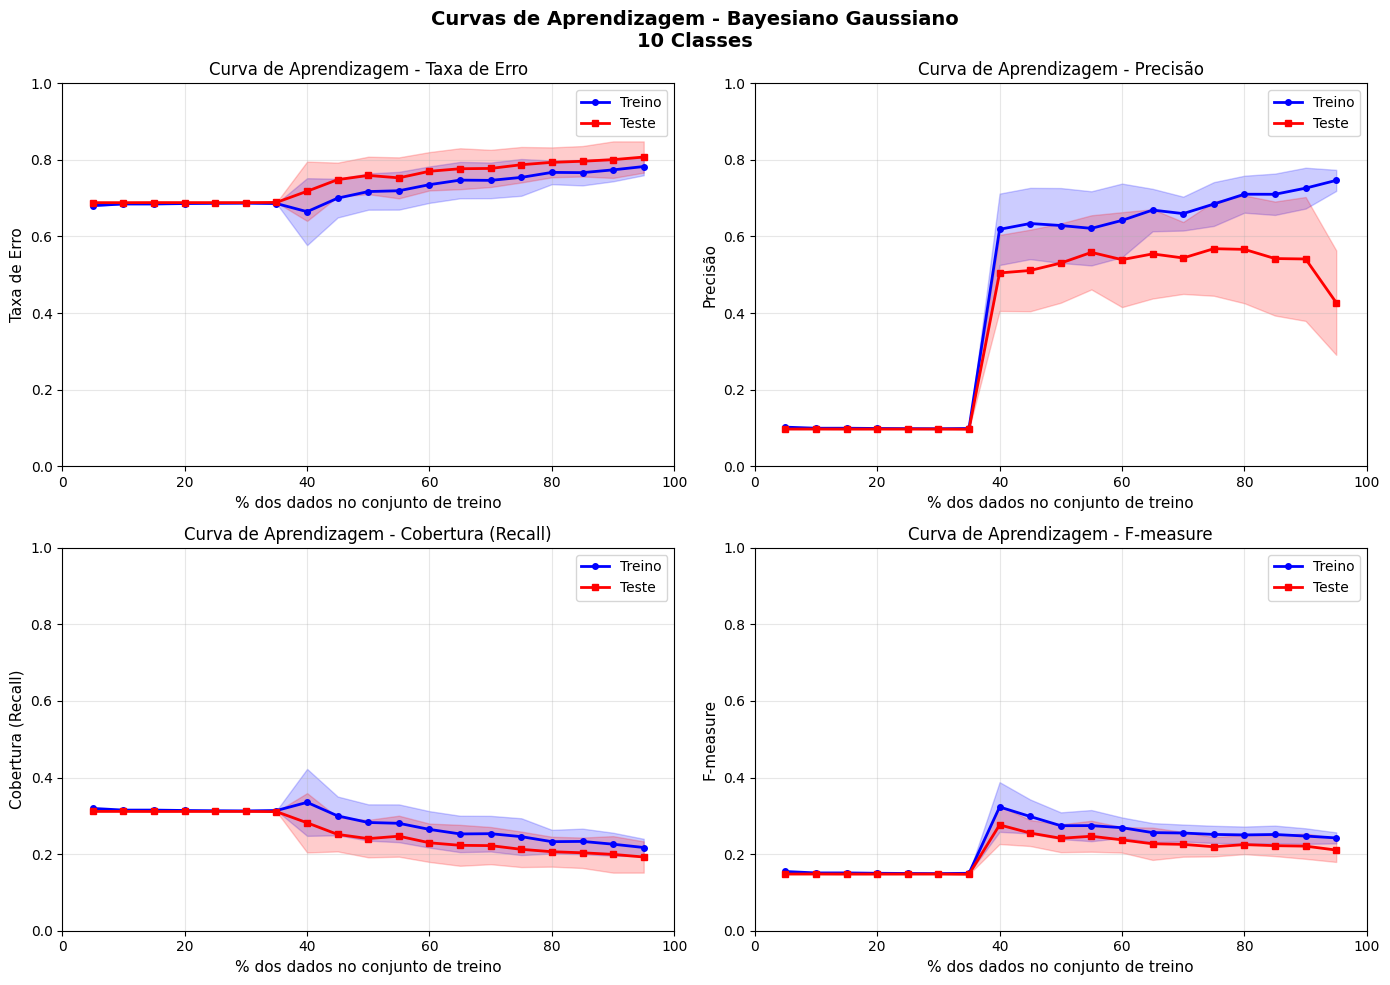


ANÁLISE DAS CURVAS DE APRENDIZAGEM - 10 Classes

Taxa de Erro:
  Inicial (5% treino): Treino=0.6806, Teste=0.6884
  Final (95% treino):  Treino=0.7827, Teste=0.8075
  Gap final (treino-teste): 0.0248
  → Possível UNDERFITTING (erro alto no treino)

Precisão:
  Inicial (5% treino): Treino=0.1020, Teste=0.0971
  Final (95% treino):  Treino=0.7466, Teste=0.4273
  Gap final (treino-teste): 0.3192
  → Possível OVERFITTING

Cobertura:
  Inicial (5% treino): Treino=0.3194, Teste=0.3116
  Final (95% treino):  Treino=0.2173, Teste=0.1925
  Gap final (treino-teste): 0.0248
  → Possível UNDERFITTING

F-measure:
  Inicial (5% treino): Treino=0.1547, Teste=0.1481
  Final (95% treino):  Treino=0.2424, Teste=0.2107
  Gap final (treino-teste): 0.0317
  → Possível UNDERFITTING

──────────────────────────────────────────────────────────────────────
COMENTÁRIOS GERAIS:
──────────────────────────────────────────────────────────────────────

⚠️ O classificador mostra sinais de UNDERFITTING:
  - Alto erro 

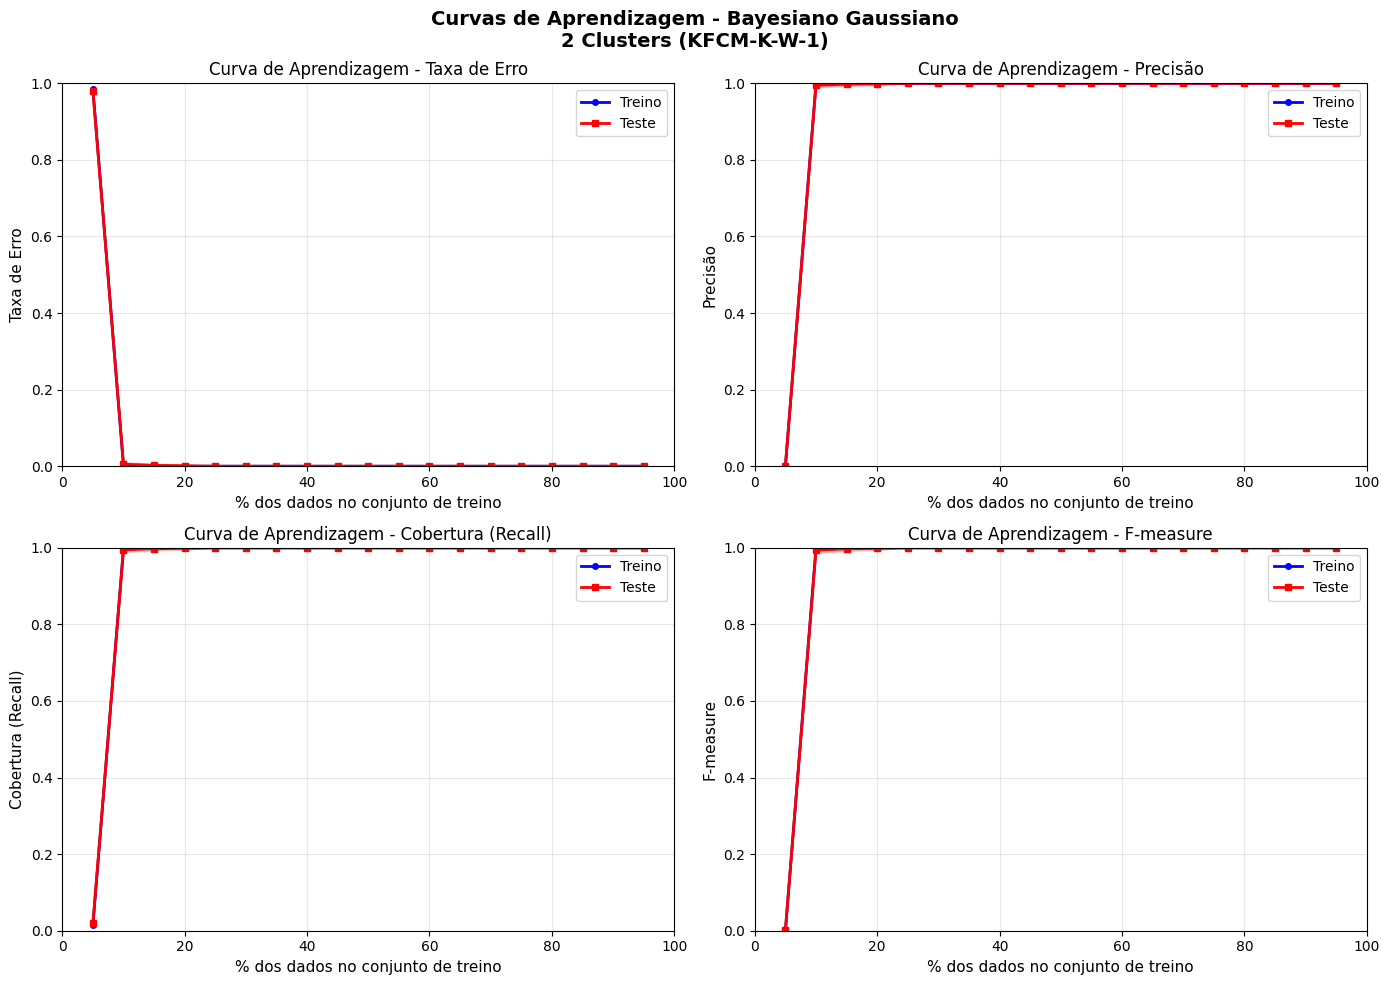


ANÁLISE DAS CURVAS DE APRENDIZAGEM - 2 Clusters

Taxa de Erro:
  Inicial (5% treino): Treino=0.9863, Teste=0.9802
  Final (95% treino):  Treino=0.0000, Teste=0.0000
  Gap final (treino-teste): 0.0000
  → Modelo bem ajustado

Precisão:
  Inicial (5% treino): Treino=0.0002, Teste=0.0004
  Final (95% treino):  Treino=1.0000, Teste=1.0000
  Gap final (treino-teste): 0.0000
  → Modelo bem ajustado

Cobertura:
  Inicial (5% treino): Treino=0.0137, Teste=0.0198
  Final (95% treino):  Treino=1.0000, Teste=1.0000
  Gap final (treino-teste): 0.0000
  → Modelo bem ajustado

F-measure:
  Inicial (5% treino): Treino=0.0004, Teste=0.0008
  Final (95% treino):  Treino=1.0000, Teste=1.0000
  Gap final (treino-teste): 0.0000
  → Modelo bem ajustado

──────────────────────────────────────────────────────────────────────
COMENTÁRIOS GERAIS:
──────────────────────────────────────────────────────────────────────

✓ O classificador Bayesiano Gaussiano apresenta BOM comportamento:
  - As curvas de treino e 

In [11]:
"""
================================================================================
ETAPA 8: CURVAS DE APRENDIZAGEM
================================================================================

O enunciado pede:
"d) Para cada métrica de avaliação, plot a curva de aprendizagem para o
classificador bayesiano Gaussiano. Mais precisamente, considere conjuntos
de treinamento e teste de (5%, 95%) a (95%, 5%) do conjunto original de
treinamento, com passo de 5% (usando amostragem estratificada). Para cada
par de conjuntos de treinamento e teste, compute as métricas de avaliação
tanto no conjunto de treinamento como no conjunto de teste. Comente."

Objetivo: Verificar overfitting/underfitting do Bayesiano Gaussiano
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("ETAPA 8: CURVAS DE APRENDIZAGEM")
print("="*70)


# =============================================================================
# CLASSIFICADOR BAYESIANO GAUSSIANO
# =============================================================================

class BayesianoGaussiano(BaseEstimator, ClassifierMixin):
    """Classificador Bayesiano com Normal Multivariada."""
    def __init__(self):
        self.classes_ = None
        self.priors_ = {}
        self.means_ = {}
        self.covs_inv_ = {}
        self.covs_det_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.means_[c] = np.mean(X_c, axis=0)
            cov = np.cov(X_c.T) + 1e-6 * np.eye(n_features)
            self.covs_inv_[c] = np.linalg.inv(cov)
            self.covs_det_[c] = np.linalg.det(cov)
        return self

    def _log_likelihood(self, X, c):
        d = X.shape[1]
        diff = X - self.means_[c]
        mahalanobis = np.sum(diff @ self.covs_inv_[c] * diff, axis=1)
        return -0.5 * d * np.log(2*np.pi) - 0.5 * np.log(self.covs_det_[c]) - 0.5 * mahalanobis

    def predict_proba(self, X):
        log_post = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_post[:, i] = self._log_likelihood(X, c) + np.log(self.priors_[c])
        log_post_max = np.max(log_post, axis=1, keepdims=True)
        post = np.exp(log_post - log_post_max)
        return post / np.sum(post, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


# =============================================================================
# FUNÇÕES AUXILIARES
# =============================================================================

def calculate_metrics(y_true, y_pred, average='weighted'):
    """Calcula as 4 métricas."""
    return {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }


def stratified_sample(X, y, train_size, random_state=42):
    """
    Amostragem estratificada para dividir dados em treino/teste.

    Parâmetros:
    -----------
    X : array-like
        Features
    y : array-like
        Labels
    train_size : float
        Proporção para treino (0.05 a 0.95)
    random_state : int
        Seed para reprodutibilidade

    Retorna:
    --------
    X_train, X_test, y_train, y_test
    """
    np.random.seed(random_state)

    classes = np.unique(y)
    train_indices = []
    test_indices = []

    for c in classes:
        class_indices = np.where(y == c)[0]
        np.random.shuffle(class_indices)

        n_train = max(1, int(len(class_indices) * train_size))

        train_indices.extend(class_indices[:n_train])
        test_indices.extend(class_indices[n_train:])

    train_indices = np.array(train_indices)
    test_indices = np.array(test_indices)

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


def compute_learning_curves(X, y, train_sizes=None, n_runs=10):
    """
    Computa curvas de aprendizagem para o Bayesiano Gaussiano.

    Parâmetros:
    -----------
    X : array-like
        Features (já normalizadas)
    y : array-like
        Labels
    train_sizes : array-like
        Proporções de treino a testar (default: 5% a 95%, passo 5%)
    n_runs : int
        Número de execuções para cada tamanho (para média)

    Retorna:
    --------
    dict : Métricas de treino e teste para cada tamanho
    """
    if train_sizes is None:
        train_sizes = np.arange(0.05, 1.0, 0.05)  # 5% a 95%, passo 5%

    metrics = ['error_rate', 'precision', 'recall', 'f1']

    results = {
        'train_sizes': train_sizes,
        'train': {m: [] for m in metrics},
        'test': {m: [] for m in metrics},
        'train_std': {m: [] for m in metrics},
        'test_std': {m: [] for m in metrics}
    }

    print(f"\nComputando curvas de aprendizagem...")
    print(f"Tamanhos de treino: {len(train_sizes)} ({train_sizes[0]*100:.0f}% a {train_sizes[-1]*100:.0f}%)")
    print(f"Execuções por tamanho: {n_runs}")

    for i, train_size in enumerate(train_sizes):
        train_metrics_runs = {m: [] for m in metrics}
        test_metrics_runs = {m: [] for m in metrics}

        for run in range(n_runs):
            # Amostragem estratificada
            X_train, X_test, y_train, y_test = stratified_sample(
                X, y, train_size, random_state=run
            )

            # Verificar se há amostras suficientes
            if len(X_train) < 2 or len(X_test) < 2:
                continue

            # Treinar classificador
            try:
                clf = BayesianoGaussiano()
                clf.fit(X_train, y_train)

                # Predições
                y_pred_train = clf.predict(X_train)
                y_pred_test = clf.predict(X_test)

                # Métricas
                m_train = calculate_metrics(y_train, y_pred_train)
                m_test = calculate_metrics(y_test, y_pred_test)

                for m in metrics:
                    train_metrics_runs[m].append(m_train[m])
                    test_metrics_runs[m].append(m_test[m])
            except Exception as e:
                continue

        # Média e desvio padrão
        for m in metrics:
            if train_metrics_runs[m]:
                results['train'][m].append(np.mean(train_metrics_runs[m]))
                results['test'][m].append(np.mean(test_metrics_runs[m]))
                results['train_std'][m].append(np.std(train_metrics_runs[m]))
                results['test_std'][m].append(np.std(test_metrics_runs[m]))
            else:
                results['train'][m].append(np.nan)
                results['test'][m].append(np.nan)
                results['train_std'][m].append(np.nan)
                results['test_std'][m].append(np.nan)

        if (i + 1) % 5 == 0:
            print(f"  Progresso: {i+1}/{len(train_sizes)} tamanhos")

    return results


def plot_learning_curves(results, version_name, output_file=None):
    """
    Plota as curvas de aprendizagem.

    Parâmetros:
    -----------
    results : dict
        Resultados de compute_learning_curves
    version_name : str
        Nome da versão do dataset
    output_file : str
        Caminho para salvar a figura (opcional)
    """
    train_sizes = results['train_sizes'] * 100  # Converter para percentual

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura (Recall)', 'F-measure']

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Curvas de Aprendizagem - Bayesiano Gaussiano\n{version_name}',
                 fontsize=14, fontweight='bold')

    for ax, metric, title in zip(axes.flatten(), metrics, metric_names):
        train_mean = np.array(results['train'][metric])
        test_mean = np.array(results['test'][metric])
        train_std = np.array(results['train_std'][metric])
        test_std = np.array(results['test_std'][metric])

        # Linha de treino
        ax.plot(train_sizes, train_mean, 'b-o', label='Treino', markersize=4, linewidth=2)
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                       alpha=0.2, color='blue')

        # Linha de teste
        ax.plot(train_sizes, test_mean, 'r-s', label='Teste', markersize=4, linewidth=2)
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                       alpha=0.2, color='red')

        ax.set_xlabel('% dos dados no conjunto de treino', fontsize=11)
        ax.set_ylabel(title, fontsize=11)
        ax.set_title(f'Curva de Aprendizagem - {title}', fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 100)

        # Definir limites do eixo Y baseado na métrica
        if metric == 'error_rate':
            ax.set_ylim(0, 1)
        else:
            ax.set_ylim(0, 1)

    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=150, bbox_inches='tight')
        print(f"\nFigura salva em: {output_file}")

    plt.show()


def analyze_learning_curves(results, version_name):
    """
    Analisa as curvas de aprendizagem e gera comentários.

    Parâmetros:
    -----------
    results : dict
        Resultados das curvas
    version_name : str
        Nome da versão
    """
    print(f"\n{'='*70}")
    print(f"ANÁLISE DAS CURVAS DE APRENDIZAGEM - {version_name}")
    print(f"{'='*70}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura', 'F-measure']

    for metric, name in zip(metrics, metric_names):
        train_final = results['train'][metric][-1]
        test_final = results['test'][metric][-1]
        train_initial = results['train'][metric][0]
        test_initial = results['test'][metric][0]

        gap = abs(train_final - test_final)

        print(f"\n{name}:")
        print(f"  Inicial (5% treino): Treino={train_initial:.4f}, Teste={test_initial:.4f}")
        print(f"  Final (95% treino):  Treino={train_final:.4f}, Teste={test_final:.4f}")
        print(f"  Gap final (treino-teste): {gap:.4f}")

        # Diagnóstico
        if metric == 'error_rate':
            if gap > 0.1:
                print(f"  → Possível OVERFITTING (gap alto)")
            elif train_final > 0.4:
                print(f"  → Possível UNDERFITTING (erro alto no treino)")
            else:
                print(f"  → Modelo bem ajustado")
        else:
            if gap > 0.1:
                print(f"  → Possível OVERFITTING")
            elif train_final < 0.6:
                print(f"  → Possível UNDERFITTING")
            else:
                print(f"  → Modelo bem ajustado")

    print(f"\n{'─'*70}")
    print("COMENTÁRIOS GERAIS:")
    print("─"*70)

    # Análise geral
    error_gap = abs(results['train']['error_rate'][-1] - results['test']['error_rate'][-1])
    error_train = results['train']['error_rate'][-1]

    if error_gap < 0.05 and error_train < 0.3:
        print("""
✓ O classificador Bayesiano Gaussiano apresenta BOM comportamento:
  - As curvas de treino e teste convergem (baixo gap)
  - O modelo generaliza bem para dados não vistos
  - Não há sinais claros de overfitting ou underfitting
        """)
    elif error_gap > 0.1:
        print("""
⚠️ O classificador mostra sinais de OVERFITTING:
  - Grande diferença entre desempenho no treino e teste
  - O modelo pode estar memorizando os dados de treino
  - Possível causa: classes raras com poucas amostras para estimar parâmetros
        """)
    elif error_train > 0.4:
        print("""
⚠️ O classificador mostra sinais de UNDERFITTING:
  - Alto erro mesmo no conjunto de treino
  - O modelo é muito simples para capturar os padrões
  - A suposição de normalidade multivariada pode não ser adequada
        """)
    else:
        print("""
O classificador apresenta comportamento intermediário.
Mais dados podem ajudar a melhorar o desempenho.
        """)


# =============================================================================
# EXECUÇÃO PRINCIPAL
# =============================================================================

if __name__ == "__main__":
    print("\n" + "═"*70)
    print("GERAÇÃO DAS CURVAS DE APRENDIZAGEM")
    print("═"*70)

    # ─────────────────────────────────────────────────────────────────────
    # Carregar dados
    # ─────────────────────────────────────────────────────────────────────
    print("\n[1] Carregando dados...")

    df = pd.read_csv('yeast.csv')
    X = df.drop(['Sequence Name', 'Class'], axis=1).values
    y_original = df['Class'].values

    # Labels do KFCM-K-W-1
    y_2classes = np.loadtxt('crisp_partition.txt').astype(int)

    # Codificar 10 classes
    le = LabelEncoder()
    y_10classes = le.fit_transform(y_original)

    print(f"    Amostras: {len(y_original)}")
    print(f"    Features: {X.shape[1]}")

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ─────────────────────────────────────────────────────────────────────
    # VERSÃO 1: 10 Classes
    # ─────────────────────────────────────────────────────────────────────
    print("\n" + "="*70)
    print("VERSÃO 1: 10 CLASSES ORIGINAIS")
    print("="*70)

    results_10 = compute_learning_curves(X_scaled, y_10classes, n_runs=10)
    plot_learning_curves(results_10, "10 Classes", output_file='curvas_aprendizagem_10classes.png')
    analyze_learning_curves(results_10, "10 Classes")

    # ─────────────────────────────────────────────────────────────────────
    # VERSÃO 2: 2 Classes (KFCM-K-W-1)
    # ─────────────────────────────────────────────────────────────────────
    print("\n" + "="*70)
    print("VERSÃO 2: 2 CLUSTERS (KFCM-K-W-1)")
    print("="*70)

    results_2 = compute_learning_curves(X_scaled, y_2classes, n_runs=10)
    plot_learning_curves(results_2, "2 Clusters (KFCM-K-W-1)", output_file='curvas_aprendizagem_2classes.png')
    analyze_learning_curves(results_2, "2 Clusters")

    print("\n" + "="*70)
    print("✓ Curvas de aprendizagem concluídas!")
    print("  Arquivos salvos:")
    print("    - curvas_aprendizagem_10classes.png")
    print("    - curvas_aprendizagem_2classes.png")
    print("="*70)